In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [3]:
pd.set_option('display.max_columns',None, 'display.max_rows',20)

In [77]:
file_path = os.path.join('../../../','processed_data/')
in_output_path = os.path.join('../../../','processed_data/provider_final.csv.csv')
os.listdir(file_path)

['.ipynb_checkpoints',
 'File_Description.txt',
 'Merge_final.csv',
 'provider_final.csv',
 'provider_final_old.csv',
 'provider_final_old2.csv']

In [78]:
raw_df = pd.read_csv(os.path.join(file_path,'provider_final.csv'))
raw_df = raw_df.drop(raw_df.columns[0],axis=1)
raw_df.head()

,Provider,PotentialFraud,DurationMedianIP,DurationMeanIP,DurationMedianOP,DurationMeanOP,Serves,ChronCondsMedian,ChronCondsMean,ChronConsMode,PtAgeMedian,PtAgeMean,NumPtsIP,NumPtsOP,NumStatesIP,NumStatesOP,SharePhysician,MergeAvgClaimReimbursed,NumTopCodeClaim,DupClaimNum_IP,DupClaimRatio_IP,DupClaim_IP,DupClaimStatesNum_IP,DupClaimMultiState_IP,DupClaimProviderNum_IP,DupClaimMultiProvider_IP,DupClaimStartDtNum_IP,DupClaimMultiStartDt_IP,DupClaimNum_OP,DupClaimRatio_OP,DupClaim_OP,DupClaimStatesNum_OP,DupClaimMultiState_OP,DupClaimProviderNum_OP,DupClaimMultiProvider_OP,DupClaimStartDtNum_OP,DupClaimMultiStartDt_OP,AvgDuration,NumOfPt,NumOfClm,ClmPerPt,TotalRev,RevPerPt,ClmNoPhy,ClmAllPhy,ClmNoProc,ClmPerDt
0,PRV51001,No,4.0,5.000000,0.0,0.550000,Both,6.0,5.760000,5.0,79.0,77.880000,5.0,19.0,1.0,1.0,1.0,4185.600000,5.0,0.0,0.000000,no,0.0,no,0.0,no,0.0,no,11.0,0.550000,yes,50.0,yes,422.0,yes,278.0,yes,1.44,24,25,1.04,109980,4582.50,0,2,23,1.09
1,PRV51003,Yes,4.0,5.161290,0.0,2.357143,Both,7.0,6.674242,6.0,71.0,69.083333,53.0,66.0,3.0,3.0,1.0,4588.409091,25.0,1.0,0.016129,yes,2.0,yes,2.0,yes,2.0,yes,25.0,0.357143,yes,52.0,yes,1351.0,yes,372.0,yes,3.67,117,132,1.13,671956,5743.21,0,4,93,1.19
2,PRV51004,No,0.0,0.000000,0.0,1.429530,OP,7.0,6.812081,8.0,72.0,71.261745,0.0,138.0,0.0,9.0,1.0,350.134228,5.0,0.0,0.000000,no,0.0,no,0.0,no,0.0,no,72.0,0.483221,yes,52.0,yes,3006.0,yes,375.0,yes,1.43,138,149,1.08,52480,380.29,0,12,149,1.27
3,PRV51005,Yes,0.0,0.000000,0.0,1.088412,OP,7.0,6.886695,5.0,70.0,69.526180,0.0,495.0,0.0,4.0,1.0,241.124464,25.0,0.0,0.000000,no,0.0,no,0.0,no,0.0,no,530.0,0.454936,yes,52.0,yes,3920.0,yes,382.0,yes,1.09,495,1165,2.35,284610,574.97,2,98,1165,3.27
4,PRV51007,No,5.0,5.333333,0.0,0.768116,Both,7.0,6.986111,6.0,69.5,68.305556,3.0,56.0,1.0,2.0,1.0,468.194444,3.0,0.0,0.000000,no,0.0,no,0.0,no,0.0,no,29.0,0.420290,yes,52.0,yes,1816.0,yes,371.0,yes,0.96,58,72,1.24,36974,637.48,0,8,71,1.06


In [79]:
#select needed columns, dummify and encodes script

encode_cols = raw_df[~raw_df.applymap(np.isreal)].dropna(axis=1).columns.to_list()
# normalized_col = raw_df[raw_df.applymap(np.isreal)].dropna(axis=1).columns.to_list()
# print(encode_cols)
raw_df[encode_cols[3:]] = raw_df[encode_cols[3:]].applymap(lambda x: 1 if x.lower() == 'yes' else 0)
raw_df = pd.concat([raw_df,pd.get_dummies(raw_df['Serves'],prefix='Serves_')],axis=1)
#use for linear model to remove multi-colinearity
# raw_df.drop(['Serves','Serves__Both'], axis=1, inplace=True)
#Use only for tree model as we do not care about Muli-colinearity
raw_df.drop(['Serves'], axis=1, inplace=True)

raw_df.set_index('Provider',inplace=True)
target_df = raw_df[['PotentialFraud']]
target_df['PotentialFraud'] = target_df.PotentialFraud.map(lambda x: 1 if x.lower() == 'yes' else 0)
raw_df.drop('PotentialFraud',axis=1, inplace=True)

# norm_df = pd.DataFrame(normalize(raw_df[normalized_col],return_norm=False), columns=normalized_col, index=raw_df.index)
# df = pd.merge(raw_df.drop(raw_df[normalized_col],axis=1), norm_df, left_index=True, right_index=True)
# No need to normalized for tree algorithm 
df = raw_df
df.head()

C:\Users\patri\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,DurationMedianIP,DurationMeanIP,DurationMedianOP,DurationMeanOP,Serves,ChronCondsMedian,ChronCondsMean,ChronConsMode,PtAgeMedian,PtAgeMean,NumPtsIP,NumPtsOP,NumStatesIP,NumStatesOP,SharePhysician,MergeAvgClaimReimbursed,NumTopCodeClaim,DupClaimNum_IP,DupClaimRatio_IP,DupClaim_IP,DupClaimStatesNum_IP,DupClaimMultiState_IP,DupClaimProviderNum_IP,DupClaimMultiProvider_IP,DupClaimStartDtNum_IP,DupClaimMultiStartDt_IP,DupClaimNum_OP,DupClaimRatio_OP,DupClaim_OP,DupClaimStatesNum_OP,DupClaimMultiState_OP,DupClaimProviderNum_OP,DupClaimMultiProvider_OP,DupClaimStartDtNum_OP,DupClaimMultiStartDt_OP,AvgDuration,NumOfPt,NumOfClm,ClmPerPt,TotalRev,RevPerPt,ClmNoPhy,ClmAllPhy,ClmNoProc,ClmPerDt,Serves__Both,Serves__IP,Serves__OP
Provider,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PRV51001,4.0,5.000000,0.0,0.550000,Both,6.0,5.760000,5.0,79.0,77.880000,5.0,19.0,1.0,1.0,1.0,4185.600000,5.0,0.0,0.000000,0,0.0,0,0.0,0,0.0,0,11.0,0.550000,1,50.0,1,422.0,1,278.0,1,1.44,24,25,1.04,109980,4582.50,0,2,23,1.09,1,0,0
PRV51003,4.0,5.161290,0.0,2.357143,Both,7.0,6.674242,6.0,71.0,69.083333,53.0,66.0,3.0,3.0,1.0,4588.409091,25.0,1.0,0.016129,1,2.0,1,2.0,1,2.0,1,25.0,0.357143,1,52.0,1,1351.0,1,372.0,1,3.67,117,132,1.13,671956,5743.21,0,4,93,1.19,1,0,0
PRV51004,0.0,0.000000,0.0,1.429530,OP,7.0,6.812081,8.0,72.0,71.261745,0.0,138.0,0.0,9.0,1.0,350.134228,5.0,0.0,0.000000,0,0.0,0,0.0,0,0.0,0,72.0,0.483221,1,52.0,1,3006.0,1,375.0,1,1.43,138,149,1.08,52480,380.29,0,12,149,1.27,0,0,1
PRV51005,0.0,0.000000,0.0,1.088412,OP,7.0,6.886695,5.0,70.0,69.526180,0.0,495.0,0.0,4.0,1.0,241.124464,25.0,0.0,0.000000,0,0.0,0,0.0,0,0.0,0,530.0,0.454936,1,52.0,1,3920.0,1,382.0,1,1.09,495,1165,2.35,284610,574.97,2,98,1165,3.27,0,0,1
PRV51007,5.0,5.333333,0.0,0.768116,Both,7.0,6.986111,6.0,69.5,68.305556,3.0,56.0,1.0,2.0,1.0,468.194444,3.0,0.0,0.000000,0,0.0,0,0.0,0,0.0,0,29.0,0.420290,1,52.0,1,1816.0,1,371.0,1,0.96,58,72,1.24,36974,637.48,0,8,71,1.06,1,0,0


In [15]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklean.metrics import clas
# from sklearn.model_selection import model_selection

In [16]:
# This can be taking care of by using stratify=Class_to_be_Balanced
sm = SMOTE(random_state=0)
X_train,X_test,y_train,y_test = train_test_split(df,target_df.PotentialFraud, random_state=0,test_size=0.2,
                                                 stratify=target_df.PotentialFraud)

# X_train, X_test, y_train,y_test = train_test_split(df,target_df, random_state=0,test_size=0.2)
X_train, y_train = sm.fit_sample(X_train,y_train)

In [108]:
sm = SMOTE(random_state=0)
X_train, y_train = sm.fit_sample(X_train,y_train)

In [115]:
y_train.value_counts()
y_train.shape

(7846,)

In [114]:
X_train.shape

(7846, 47)

##### Linear Model

In [28]:
logit = LogisticRegression(penalty='l1',C=0.1,random_state=0, solver='liblinear')

In [78]:
logit.fit(df,target_df)

C:\Users\patri\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(C=0.1, penalty='l1', random_state=0, solver='liblinear')

In [79]:
logit.score(X_train,y_train)

0.7326859187324304

In [90]:
logit.score(X_test,y_test)

0.9473197781885397

In [30]:
l_gs = {'C':np.linspace(0,1,20)}

In [31]:
logit_gs = GridSearchCV(estimator= logit, param_grid= l_gs, cv=5, scoring='recall')

In [32]:
logit_gs.fit(X_train,y_train)

C:\Users\patri\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\patri\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\patri\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\patri\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1360, in fit
    sample_weight=sample_weight)
  File "C:\Users\patri\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 969, in _fit_liblinear
    epsilon, sample_weight)
  File "sklearn\svm\_liblinear.pyx", line 52, in sklearn.s

C:\Users\patri\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\patri\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\patri\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\patri\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\patri\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\patri\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\patri\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\patri\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\patri\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\patri\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\patri\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\patri\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

GridSearchCV(cv=5,
             estimator=LogisticRegression(C=0.1, penalty='l1', random_state=0,
                                          solver='liblinear'),
             param_grid={'C': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])},
             scoring='recall')

In [33]:
logit_gs.best_score_

0.922318905906524

In [139]:
logit_gs.best_estimator_

LogisticRegression(C=0.6842105263157894, penalty='l1', random_state=0,
                   solver='liblinear')

In [130]:
logit_gs.best_score_

0.9150312348263213

In [85]:
prop = logit.predict_proba(X_train)

In [89]:
(prop > 0.9).map(lambda x: 1 if x else 0)

AttributeError: 'numpy.ndarray' object has no attribute 'map'

In [93]:
np.linspace(0,1,20)

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

##### Tree Model 

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, recall_score, make_scorer, accuracy_score
from sklearn.metrics import balanced_accuracy_score, f1_score, precision_score
from sklearn.preprocessing import normalize

In [52]:
#df[normalized_col]

In [42]:
norm_df.head()

,DurationMedianIP,DurationMeanIP,DurationMedianOP,DurationMeanOP,ChronCondsMedian,ChronCondsMean,ChronConsMode,PtAgeMedian,PtAgeMean,NumPtsIP,NumPtsOP,NumStatesIP,NumStatesOP,SharePhysician,MergeAvgClaimReimbursed,NumTopCodeClaim,DupClaimNum_IP,DupClaimRatio_IP,DupClaimStatesNum_IP,DupClaimProviderNum_IP,DupClaimStartDtNum_IP,DupClaimNum_OP,DupClaimRatio_OP,DupClaimStatesNum_OP,DupClaimProviderNum_OP,DupClaimStartDtNum_OP,AvgDuration,NumOfPt,NumOfClm,ClmPerPt,TotalRev,RevPerPt,ClmNoPhy,ClmAllPhy,ClmNoProc,ClmPerDt
0,0.000036,0.000045,0.0,0.000005,0.000054,0.000052,0.000045,0.000717,0.000707,0.000045,0.000172,0.000009,0.000009,0.000009,0.037997,0.000045,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000100,4.992909e-06,0.000454,0.003831,0.002524,0.000013,0.000218,0.000227,0.000009,0.998400,0.041600,0.000000,0.000018,0.000209,0.000010
1,0.000006,0.000008,0.0,0.000004,0.000010,0.000010,0.000009,0.000106,0.000103,0.000079,0.000098,0.000004,0.000004,0.000001,0.006828,0.000037,0.000001,2.400162e-08,0.000003,0.000003,0.000003,0.000037,5.314644e-07,0.000077,0.002010,0.000554,0.000005,0.000174,0.000196,0.000002,0.999938,0.008546,0.000000,0.000006,0.000138,0.000002
2,0.000000,0.000000,0.0,0.000027,0.000133,0.000130,0.000152,0.001370,0.001356,0.000000,0.002625,0.000000,0.000171,0.000019,0.006660,0.000095,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.001370,9.191812e-06,0.000989,0.057180,0.007133,0.000027,0.002625,0.002834,0.000021,0.998272,0.007234,0.000000,0.000228,0.002834,0.000024
3,0.000000,0.000000,0.0,0.000004,0.000025,0.000024,0.000018,0.000246,0.000244,0.000000,0.001739,0.000000,0.000014,0.000004,0.000847,0.000088,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.001862,1.598261e-06,0.000183,0.013772,0.001342,0.000004,0.001739,0.004093,0.000008,0.999880,0.002020,0.000007,0.000344,0.004093,0.000011
4,0.000135,0.000144,0.0,0.000021,0.000189,0.000189,0.000162,0.001877,0.001845,0.000081,0.001512,0.000027,0.000054,0.000027,0.012644,0.000081,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000783,1.135020e-05,0.001404,0.049042,0.010019,0.000026,0.001566,0.001944,0.000033,0.998507,0.017216,0.000000,0.000216,0.001917,0.000029


,DupClaim_IP,DupClaimMultiState_IP,DupClaimMultiProvider_IP,DupClaimMultiStartDt_IP,DupClaim_OP,DupClaimMultiState_OP,DupClaimMultiProvider_OP,DupClaimMultiStartDt_OP,Serves__Both,Serves__IP,Serves__OP
Provider,,,,,,,,,,,
PRV51001,0,0,0,0,1,1,1,1,1,0,0
PRV51003,1,1,1,1,1,1,1,1,1,0,0
PRV51004,0,0,0,0,1,1,1,1,0,0,1
PRV51005,0,0,0,0,1,1,1,1,0,0,1
PRV51007,0,0,0,0,1,1,1,1,1,0,0


In [60]:
# nom_df.head()
norm_df.shape

(5410, 47)

In [109]:
def score(cm):
    print(cm[0][0]/(cm[0][0] + cm[0][1]))
    print(cm[1][1]/(cm[1][1] + cm[1][0]))

In [19]:
# rfc = RandomForestClassifier(min_samples_split=4,min_samples_leaf=4,criterion='gini' )
# rfc.fit(X_train,y_train)
# rfc.score(X_train,y_train)
rfc = RandomForestClassifier(criterion='gini',class_weight='balanced' )

In [116]:
#average = 'weighted' is used for multiclass classification when you calculate accuracy for each class and weighter 
#by each class. in case of iris dataset you will caculate accuracy of versicolor, setosa and virginica 
kf5 = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)
scores = {'recall': make_scorer(recall_score, pos_label = 1, average = 'binary'), 
#           'f1': make_scorer(f1_score, pos_label = 1, average = 'binary'),#
          'precision': make_scorer(precision_score, pos_label = 1, average = 'binary')
          #'accuracy': make_scorer(balanced_accuracy_score),
#           'specificity': make_scorer(recall_score, pos_label = 0, average = 'binary')
         }
rfc_gs_params ={'min_samples_split':np.arange(5,21,5),'max_features':np.arange(1,7,1)}
rfc_gs_params

{'min_samples_split': array([ 5, 10, 15, 20]),
 'max_features': array([1, 2, 3, 4, 5, 6])}

In [57]:
rfc.classes_

array([0, 1], dtype=int64)

In [ ]:
# pd.DataFrame(rfc.feature_importances_.reshape(1,-1),columns=X_train.columns.to_list())
# pd.Series(rfc.feature_importances_,index=X_train.columns.to_list()).sort_values(ascending=False).head(20)

In [21]:
rfc_gs = GridSearchCV(rfc, param_grid=rfc_gs_params, scoring=scores, cv=kf5, verbose=2, refit=False)

%timeit rfc_gs.fit(X_train,y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV] max_features=4, min_samples_leaf=4, min_samples_split=5 .........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_features=4, min_samples_leaf=4, min_samples_split=5, total=   0.4s
[CV] max_features=4, min_samples_leaf=4, min_samples_split=5 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  max_features=4, min_samples_leaf=4, min_samples_split=5, total=   0.4s
[CV] max_features=4, min_samples_leaf=4, min_samples_split=5 .........
[CV]  max_features=4, min_samples_leaf=4, min_samples_split=5, total=   0.4s
[CV] max_features=4, min_samples_leaf=4, min_samples_split=5 .........
[CV]  max_features=4, min_samples_leaf=4, min_samples_split=5, total=   0.4s
[CV] max_features=4, min_samples_leaf=4, min_samples_split=5 .........
[CV]  max_features=4, min_samples_leaf=4, min_samples_split=5, total=   0.4s
[CV] max_features=4, min_samples_leaf=4, min_samples_split=10 ........
[CV]  max_features=4, min_samples_leaf=4, min_samples_split=10, total=   0.4s
[CV] max_features=4, min_samples_leaf=4, min_samples_split=10 ........
[CV]  max_features=4, min_samples_leaf=4, min_samples_split=10, total=   0.4s
[CV] max_features=4, min_samples_leaf=4, min_samples_split=10 ........
[CV]  max_features=4, min_samples_leaf=4, min_samples_split=10, total=   0.4s
[CV] max_features=4, min_samples

[CV]  max_features=4, min_samples_leaf=8, min_samples_split=20, total=   0.4s
[CV] max_features=4, min_samples_leaf=8, min_samples_split=20 ........
[CV]  max_features=4, min_samples_leaf=8, min_samples_split=20, total=   0.4s
[CV] max_features=4, min_samples_leaf=8, min_samples_split=20 ........
[CV]  max_features=4, min_samples_leaf=8, min_samples_split=20, total=   0.4s
[CV] max_features=4, min_samples_leaf=10, min_samples_split=5 ........
[CV]  max_features=4, min_samples_leaf=10, min_samples_split=5, total=   0.4s
[CV] max_features=4, min_samples_leaf=10, min_samples_split=5 ........
[CV]  max_features=4, min_samples_leaf=10, min_samples_split=5, total=   0.4s
[CV] max_features=4, min_samples_leaf=10, min_samples_split=5 ........
[CV]  max_features=4, min_samples_leaf=10, min_samples_split=5, total=   0.4s
[CV] max_features=4, min_samples_leaf=10, min_samples_split=5 ........
[CV]  max_features=4, min_samples_leaf=10, min_samples_split=5, total=   0.4s
[CV] max_features=4, min_sam

[CV]  max_features=4, min_samples_leaf=14, min_samples_split=15, total=   0.4s
[CV] max_features=4, min_samples_leaf=14, min_samples_split=15 .......
[CV]  max_features=4, min_samples_leaf=14, min_samples_split=15, total=   0.4s
[CV] max_features=4, min_samples_leaf=14, min_samples_split=15 .......
[CV]  max_features=4, min_samples_leaf=14, min_samples_split=15, total=   0.4s
[CV] max_features=4, min_samples_leaf=14, min_samples_split=20 .......
[CV]  max_features=4, min_samples_leaf=14, min_samples_split=20, total=   0.4s
[CV] max_features=4, min_samples_leaf=14, min_samples_split=20 .......
[CV]  max_features=4, min_samples_leaf=14, min_samples_split=20, total=   0.4s
[CV] max_features=4, min_samples_leaf=14, min_samples_split=20 .......
[CV]  max_features=4, min_samples_leaf=14, min_samples_split=20, total=   0.5s
[CV] max_features=4, min_samples_leaf=14, min_samples_split=20 .......
[CV]  max_features=4, min_samples_leaf=14, min_samples_split=20, total=   0.7s
[CV] max_features=4, 

[CV]  max_features=6, min_samples_leaf=4, min_samples_split=10, total=   0.5s
[CV] max_features=6, min_samples_leaf=4, min_samples_split=10 ........
[CV]  max_features=6, min_samples_leaf=4, min_samples_split=10, total=   0.6s
[CV] max_features=6, min_samples_leaf=4, min_samples_split=10 ........
[CV]  max_features=6, min_samples_leaf=4, min_samples_split=10, total=   0.5s
[CV] max_features=6, min_samples_leaf=4, min_samples_split=15 ........
[CV]  max_features=6, min_samples_leaf=4, min_samples_split=15, total=   0.5s
[CV] max_features=6, min_samples_leaf=4, min_samples_split=15 ........
[CV]  max_features=6, min_samples_leaf=4, min_samples_split=15, total=   0.8s
[CV] max_features=6, min_samples_leaf=4, min_samples_split=15 ........
[CV]  max_features=6, min_samples_leaf=4, min_samples_split=15, total=   0.9s
[CV] max_features=6, min_samples_leaf=4, min_samples_split=15 ........
[CV]  max_features=6, min_samples_leaf=4, min_samples_split=15, total=   0.5s
[CV] max_features=6, min_sam

[CV]  max_features=6, min_samples_leaf=10, min_samples_split=5, total=   0.5s
[CV] max_features=6, min_samples_leaf=10, min_samples_split=5 ........
[CV]  max_features=6, min_samples_leaf=10, min_samples_split=5, total=   0.5s
[CV] max_features=6, min_samples_leaf=10, min_samples_split=10 .......
[CV]  max_features=6, min_samples_leaf=10, min_samples_split=10, total=   0.5s
[CV] max_features=6, min_samples_leaf=10, min_samples_split=10 .......
[CV]  max_features=6, min_samples_leaf=10, min_samples_split=10, total=   0.4s
[CV] max_features=6, min_samples_leaf=10, min_samples_split=10 .......
[CV]  max_features=6, min_samples_leaf=10, min_samples_split=10, total=   0.4s
[CV] max_features=6, min_samples_leaf=10, min_samples_split=10 .......
[CV]  max_features=6, min_samples_leaf=10, min_samples_split=10, total=   0.4s
[CV] max_features=6, min_samples_leaf=10, min_samples_split=10 .......
[CV]  max_features=6, min_samples_leaf=10, min_samples_split=10, total=   0.4s
[CV] max_features=6, mi

[CV]  max_features=6, min_samples_leaf=14, min_samples_split=20, total=   0.4s
[CV] max_features=6, min_samples_leaf=14, min_samples_split=20 .......
[CV]  max_features=6, min_samples_leaf=14, min_samples_split=20, total=   0.4s
[CV] max_features=6, min_samples_leaf=16, min_samples_split=5 ........
[CV]  max_features=6, min_samples_leaf=16, min_samples_split=5, total=   0.4s
[CV] max_features=6, min_samples_leaf=16, min_samples_split=5 ........
[CV]  max_features=6, min_samples_leaf=16, min_samples_split=5, total=   0.4s
[CV] max_features=6, min_samples_leaf=16, min_samples_split=5 ........
[CV]  max_features=6, min_samples_leaf=16, min_samples_split=5, total=   0.4s
[CV] max_features=6, min_samples_leaf=16, min_samples_split=5 ........
[CV]  max_features=6, min_samples_leaf=16, min_samples_split=5, total=   0.4s
[CV] max_features=6, min_samples_leaf=16, min_samples_split=5 ........
[CV]  max_features=6, min_samples_leaf=16, min_samples_split=5, total=   0.4s
[CV] max_features=6, min_s

[CV]  max_features=8, min_samples_leaf=4, min_samples_split=15, total=   0.7s
[CV] max_features=8, min_samples_leaf=4, min_samples_split=15 ........
[CV]  max_features=8, min_samples_leaf=4, min_samples_split=15, total=   0.7s
[CV] max_features=8, min_samples_leaf=4, min_samples_split=20 ........
[CV]  max_features=8, min_samples_leaf=4, min_samples_split=20, total=   0.8s
[CV] max_features=8, min_samples_leaf=4, min_samples_split=20 ........
[CV]  max_features=8, min_samples_leaf=4, min_samples_split=20, total=   0.8s
[CV] max_features=8, min_samples_leaf=4, min_samples_split=20 ........
[CV]  max_features=8, min_samples_leaf=4, min_samples_split=20, total=   0.6s
[CV] max_features=8, min_samples_leaf=4, min_samples_split=20 ........
[CV]  max_features=8, min_samples_leaf=4, min_samples_split=20, total=   0.7s
[CV] max_features=8, min_samples_leaf=4, min_samples_split=20 ........
[CV]  max_features=8, min_samples_leaf=4, min_samples_split=20, total=   0.8s
[CV] max_features=8, min_sam

[CV]  max_features=8, min_samples_leaf=10, min_samples_split=10, total=   0.5s
[CV] max_features=8, min_samples_leaf=10, min_samples_split=15 .......
[CV]  max_features=8, min_samples_leaf=10, min_samples_split=15, total=   0.5s
[CV] max_features=8, min_samples_leaf=10, min_samples_split=15 .......
[CV]  max_features=8, min_samples_leaf=10, min_samples_split=15, total=   0.5s
[CV] max_features=8, min_samples_leaf=10, min_samples_split=15 .......
[CV]  max_features=8, min_samples_leaf=10, min_samples_split=15, total=   0.5s
[CV] max_features=8, min_samples_leaf=10, min_samples_split=15 .......
[CV]  max_features=8, min_samples_leaf=10, min_samples_split=15, total=   0.5s
[CV] max_features=8, min_samples_leaf=10, min_samples_split=15 .......
[CV]  max_features=8, min_samples_leaf=10, min_samples_split=15, total=   0.5s
[CV] max_features=8, min_samples_leaf=10, min_samples_split=20 .......
[CV]  max_features=8, min_samples_leaf=10, min_samples_split=20, total=   0.5s
[CV] max_features=8, 

[CV]  max_features=8, min_samples_leaf=16, min_samples_split=5, total=   0.5s
[CV] max_features=8, min_samples_leaf=16, min_samples_split=10 .......
[CV]  max_features=8, min_samples_leaf=16, min_samples_split=10, total=   0.5s
[CV] max_features=8, min_samples_leaf=16, min_samples_split=10 .......
[CV]  max_features=8, min_samples_leaf=16, min_samples_split=10, total=   0.4s
[CV] max_features=8, min_samples_leaf=16, min_samples_split=10 .......
[CV]  max_features=8, min_samples_leaf=16, min_samples_split=10, total=   0.5s
[CV] max_features=8, min_samples_leaf=16, min_samples_split=10 .......
[CV]  max_features=8, min_samples_leaf=16, min_samples_split=10, total=   0.5s
[CV] max_features=8, min_samples_leaf=16, min_samples_split=10 .......
[CV]  max_features=8, min_samples_leaf=16, min_samples_split=10, total=   0.5s
[CV] max_features=8, min_samples_leaf=16, min_samples_split=15 .......
[CV]  max_features=8, min_samples_leaf=16, min_samples_split=15, total=   0.5s
[CV] max_features=8, m

[CV]  max_features=10, min_samples_leaf=4, min_samples_split=20, total=   0.6s
[CV] max_features=10, min_samples_leaf=6, min_samples_split=5 ........
[CV]  max_features=10, min_samples_leaf=6, min_samples_split=5, total=   0.6s
[CV] max_features=10, min_samples_leaf=6, min_samples_split=5 ........
[CV]  max_features=10, min_samples_leaf=6, min_samples_split=5, total=   0.6s
[CV] max_features=10, min_samples_leaf=6, min_samples_split=5 ........
[CV]  max_features=10, min_samples_leaf=6, min_samples_split=5, total=   0.6s
[CV] max_features=10, min_samples_leaf=6, min_samples_split=5 ........
[CV]  max_features=10, min_samples_leaf=6, min_samples_split=5, total=   0.6s
[CV] max_features=10, min_samples_leaf=6, min_samples_split=5 ........
[CV]  max_features=10, min_samples_leaf=6, min_samples_split=5, total=   0.6s
[CV] max_features=10, min_samples_leaf=6, min_samples_split=10 .......
[CV]  max_features=10, min_samples_leaf=6, min_samples_split=10, total=   0.6s
[CV] max_features=10, min_

[CV]  max_features=10, min_samples_leaf=10, min_samples_split=15, total=   0.6s
[CV] max_features=10, min_samples_leaf=10, min_samples_split=20 ......
[CV]  max_features=10, min_samples_leaf=10, min_samples_split=20, total=   0.7s
[CV] max_features=10, min_samples_leaf=10, min_samples_split=20 ......
[CV]  max_features=10, min_samples_leaf=10, min_samples_split=20, total=   0.6s
[CV] max_features=10, min_samples_leaf=10, min_samples_split=20 ......
[CV]  max_features=10, min_samples_leaf=10, min_samples_split=20, total=   0.6s
[CV] max_features=10, min_samples_leaf=10, min_samples_split=20 ......
[CV]  max_features=10, min_samples_leaf=10, min_samples_split=20, total=   0.6s
[CV] max_features=10, min_samples_leaf=10, min_samples_split=20 ......
[CV]  max_features=10, min_samples_leaf=10, min_samples_split=20, total=   0.6s
[CV] max_features=10, min_samples_leaf=12, min_samples_split=5 .......
[CV]  max_features=10, min_samples_leaf=12, min_samples_split=5, total=   0.6s
[CV] max_featur

[CV]  max_features=10, min_samples_leaf=16, min_samples_split=10, total=   0.6s
[CV] max_features=10, min_samples_leaf=16, min_samples_split=15 ......
[CV]  max_features=10, min_samples_leaf=16, min_samples_split=15, total=   0.7s
[CV] max_features=10, min_samples_leaf=16, min_samples_split=15 ......
[CV]  max_features=10, min_samples_leaf=16, min_samples_split=15, total=   0.5s
[CV] max_features=10, min_samples_leaf=16, min_samples_split=15 ......
[CV]  max_features=10, min_samples_leaf=16, min_samples_split=15, total=   0.6s
[CV] max_features=10, min_samples_leaf=16, min_samples_split=15 ......
[CV]  max_features=10, min_samples_leaf=16, min_samples_split=15, total=   0.7s
[CV] max_features=10, min_samples_leaf=16, min_samples_split=15 ......
[CV]  max_features=10, min_samples_leaf=16, min_samples_split=15, total=   0.6s
[CV] max_features=10, min_samples_leaf=16, min_samples_split=20 ......
[CV]  max_features=10, min_samples_leaf=16, min_samples_split=20, total=   0.6s
[CV] max_featu

[CV]  max_features=12, min_samples_leaf=6, min_samples_split=5, total=   0.7s
[CV] max_features=12, min_samples_leaf=6, min_samples_split=10 .......
[CV]  max_features=12, min_samples_leaf=6, min_samples_split=10, total=   0.7s
[CV] max_features=12, min_samples_leaf=6, min_samples_split=10 .......
[CV]  max_features=12, min_samples_leaf=6, min_samples_split=10, total=   0.6s
[CV] max_features=12, min_samples_leaf=6, min_samples_split=10 .......
[CV]  max_features=12, min_samples_leaf=6, min_samples_split=10, total=   0.7s
[CV] max_features=12, min_samples_leaf=6, min_samples_split=10 .......
[CV]  max_features=12, min_samples_leaf=6, min_samples_split=10, total=   0.7s
[CV] max_features=12, min_samples_leaf=6, min_samples_split=10 .......
[CV]  max_features=12, min_samples_leaf=6, min_samples_split=10, total=   0.8s
[CV] max_features=12, min_samples_leaf=6, min_samples_split=15 .......
[CV]  max_features=12, min_samples_leaf=6, min_samples_split=15, total=   0.7s
[CV] max_features=12, 

[CV]  max_features=12, min_samples_leaf=10, min_samples_split=20, total=   0.7s
[CV] max_features=12, min_samples_leaf=12, min_samples_split=5 .......
[CV]  max_features=12, min_samples_leaf=12, min_samples_split=5, total=   0.6s
[CV] max_features=12, min_samples_leaf=12, min_samples_split=5 .......
[CV]  max_features=12, min_samples_leaf=12, min_samples_split=5, total=   0.6s
[CV] max_features=12, min_samples_leaf=12, min_samples_split=5 .......
[CV]  max_features=12, min_samples_leaf=12, min_samples_split=5, total=   0.6s
[CV] max_features=12, min_samples_leaf=12, min_samples_split=5 .......
[CV]  max_features=12, min_samples_leaf=12, min_samples_split=5, total=   0.7s
[CV] max_features=12, min_samples_leaf=12, min_samples_split=5 .......
[CV]  max_features=12, min_samples_leaf=12, min_samples_split=5, total=   0.7s
[CV] max_features=12, min_samples_leaf=12, min_samples_split=10 ......
[CV]  max_features=12, min_samples_leaf=12, min_samples_split=10, total=   0.6s
[CV] max_features=1

[CV]  max_features=12, min_samples_leaf=16, min_samples_split=15, total=   0.7s
[CV] max_features=12, min_samples_leaf=16, min_samples_split=20 ......
[CV]  max_features=12, min_samples_leaf=16, min_samples_split=20, total=   0.7s
[CV] max_features=12, min_samples_leaf=16, min_samples_split=20 ......
[CV]  max_features=12, min_samples_leaf=16, min_samples_split=20, total=   0.6s
[CV] max_features=12, min_samples_leaf=16, min_samples_split=20 ......
[CV]  max_features=12, min_samples_leaf=16, min_samples_split=20, total=   0.6s
[CV] max_features=12, min_samples_leaf=16, min_samples_split=20 ......
[CV]  max_features=12, min_samples_leaf=16, min_samples_split=20, total=   0.7s
[CV] max_features=12, min_samples_leaf=16, min_samples_split=20 ......
[CV]  max_features=12, min_samples_leaf=16, min_samples_split=20, total=   0.7s
[CV] max_features=12, min_samples_leaf=18, min_samples_split=5 .......
[CV]  max_features=12, min_samples_leaf=18, min_samples_split=5, total=   0.7s
[CV] max_featur

[CV]  max_features=14, min_samples_leaf=6, min_samples_split=10, total=   0.8s
[CV] max_features=14, min_samples_leaf=6, min_samples_split=15 .......
[CV]  max_features=14, min_samples_leaf=6, min_samples_split=15, total=   0.8s
[CV] max_features=14, min_samples_leaf=6, min_samples_split=15 .......
[CV]  max_features=14, min_samples_leaf=6, min_samples_split=15, total=   0.7s
[CV] max_features=14, min_samples_leaf=6, min_samples_split=15 .......
[CV]  max_features=14, min_samples_leaf=6, min_samples_split=15, total=   0.8s
[CV] max_features=14, min_samples_leaf=6, min_samples_split=15 .......
[CV]  max_features=14, min_samples_leaf=6, min_samples_split=15, total=   0.8s
[CV] max_features=14, min_samples_leaf=6, min_samples_split=15 .......
[CV]  max_features=14, min_samples_leaf=6, min_samples_split=15, total=   0.8s
[CV] max_features=14, min_samples_leaf=6, min_samples_split=20 .......
[CV]  max_features=14, min_samples_leaf=6, min_samples_split=20, total=   0.7s
[CV] max_features=14,

[CV]  max_features=14, min_samples_leaf=12, min_samples_split=5, total=   1.1s
[CV] max_features=14, min_samples_leaf=12, min_samples_split=10 ......
[CV]  max_features=14, min_samples_leaf=12, min_samples_split=10, total=   0.8s
[CV] max_features=14, min_samples_leaf=12, min_samples_split=10 ......
[CV]  max_features=14, min_samples_leaf=12, min_samples_split=10, total=   0.7s
[CV] max_features=14, min_samples_leaf=12, min_samples_split=10 ......
[CV]  max_features=14, min_samples_leaf=12, min_samples_split=10, total=   0.8s
[CV] max_features=14, min_samples_leaf=12, min_samples_split=10 ......
[CV]  max_features=14, min_samples_leaf=12, min_samples_split=10, total=   0.8s
[CV] max_features=14, min_samples_leaf=12, min_samples_split=10 ......
[CV]  max_features=14, min_samples_leaf=12, min_samples_split=10, total=   0.8s
[CV] max_features=14, min_samples_leaf=12, min_samples_split=15 ......
[CV]  max_features=14, min_samples_leaf=12, min_samples_split=15, total=   0.7s
[CV] max_featur

[CV]  max_features=14, min_samples_leaf=16, min_samples_split=20, total=   0.8s
[CV] max_features=14, min_samples_leaf=18, min_samples_split=5 .......
[CV]  max_features=14, min_samples_leaf=18, min_samples_split=5, total=   0.7s
[CV] max_features=14, min_samples_leaf=18, min_samples_split=5 .......
[CV]  max_features=14, min_samples_leaf=18, min_samples_split=5, total=   0.7s
[CV] max_features=14, min_samples_leaf=18, min_samples_split=5 .......
[CV]  max_features=14, min_samples_leaf=18, min_samples_split=5, total=   0.7s
[CV] max_features=14, min_samples_leaf=18, min_samples_split=5 .......
[CV]  max_features=14, min_samples_leaf=18, min_samples_split=5, total=   0.7s
[CV] max_features=14, min_samples_leaf=18, min_samples_split=5 .......
[CV]  max_features=14, min_samples_leaf=18, min_samples_split=5, total=   0.7s
[CV] max_features=14, min_samples_leaf=18, min_samples_split=10 ......
[CV]  max_features=14, min_samples_leaf=18, min_samples_split=10, total=   0.7s
[CV] max_features=1

[CV]  max_features=16, min_samples_leaf=6, min_samples_split=15, total=   0.9s
[CV] max_features=16, min_samples_leaf=6, min_samples_split=20 .......
[CV]  max_features=16, min_samples_leaf=6, min_samples_split=20, total=   0.8s
[CV] max_features=16, min_samples_leaf=6, min_samples_split=20 .......
[CV]  max_features=16, min_samples_leaf=6, min_samples_split=20, total=   0.8s
[CV] max_features=16, min_samples_leaf=6, min_samples_split=20 .......
[CV]  max_features=16, min_samples_leaf=6, min_samples_split=20, total=   0.9s
[CV] max_features=16, min_samples_leaf=6, min_samples_split=20 .......
[CV]  max_features=16, min_samples_leaf=6, min_samples_split=20, total=   0.9s
[CV] max_features=16, min_samples_leaf=6, min_samples_split=20 .......
[CV]  max_features=16, min_samples_leaf=6, min_samples_split=20, total=   0.9s
[CV] max_features=16, min_samples_leaf=8, min_samples_split=5 ........
[CV]  max_features=16, min_samples_leaf=8, min_samples_split=5, total=   0.8s
[CV] max_features=16, 

[CV]  max_features=16, min_samples_leaf=12, min_samples_split=10, total=   0.9s
[CV] max_features=16, min_samples_leaf=12, min_samples_split=15 ......
[CV]  max_features=16, min_samples_leaf=12, min_samples_split=15, total=   0.8s
[CV] max_features=16, min_samples_leaf=12, min_samples_split=15 ......
[CV]  max_features=16, min_samples_leaf=12, min_samples_split=15, total=   0.8s
[CV] max_features=16, min_samples_leaf=12, min_samples_split=15 ......
[CV]  max_features=16, min_samples_leaf=12, min_samples_split=15, total=   0.9s
[CV] max_features=16, min_samples_leaf=12, min_samples_split=15 ......
[CV]  max_features=16, min_samples_leaf=12, min_samples_split=15, total=   0.9s
[CV] max_features=16, min_samples_leaf=12, min_samples_split=15 ......
[CV]  max_features=16, min_samples_leaf=12, min_samples_split=15, total=   0.9s
[CV] max_features=16, min_samples_leaf=12, min_samples_split=20 ......
[CV]  max_features=16, min_samples_leaf=12, min_samples_split=20, total=   0.9s
[CV] max_featu

[CV]  max_features=16, min_samples_leaf=18, min_samples_split=5, total=   0.8s
[CV] max_features=16, min_samples_leaf=18, min_samples_split=10 ......
[CV]  max_features=16, min_samples_leaf=18, min_samples_split=10, total=   0.8s
[CV] max_features=16, min_samples_leaf=18, min_samples_split=10 ......
[CV]  max_features=16, min_samples_leaf=18, min_samples_split=10, total=   0.7s
[CV] max_features=16, min_samples_leaf=18, min_samples_split=10 ......
[CV]  max_features=16, min_samples_leaf=18, min_samples_split=10, total=   0.8s
[CV] max_features=16, min_samples_leaf=18, min_samples_split=10 ......
[CV]  max_features=16, min_samples_leaf=18, min_samples_split=10, total=   0.9s
[CV] max_features=16, min_samples_leaf=18, min_samples_split=10 ......
[CV]  max_features=16, min_samples_leaf=18, min_samples_split=10, total=   0.8s
[CV] max_features=16, min_samples_leaf=18, min_samples_split=15 ......
[CV]  max_features=16, min_samples_leaf=18, min_samples_split=15, total=   0.7s
[CV] max_featur

[CV]  max_features=18, min_samples_leaf=6, min_samples_split=20, total=   1.1s
[CV] max_features=18, min_samples_leaf=8, min_samples_split=5 ........
[CV]  max_features=18, min_samples_leaf=8, min_samples_split=5, total=   1.1s
[CV] max_features=18, min_samples_leaf=8, min_samples_split=5 ........
[CV]  max_features=18, min_samples_leaf=8, min_samples_split=5, total=   0.9s
[CV] max_features=18, min_samples_leaf=8, min_samples_split=5 ........
[CV]  max_features=18, min_samples_leaf=8, min_samples_split=5, total=   0.9s
[CV] max_features=18, min_samples_leaf=8, min_samples_split=5 ........
[CV]  max_features=18, min_samples_leaf=8, min_samples_split=5, total=   1.0s
[CV] max_features=18, min_samples_leaf=8, min_samples_split=5 ........
[CV]  max_features=18, min_samples_leaf=8, min_samples_split=5, total=   1.0s
[CV] max_features=18, min_samples_leaf=8, min_samples_split=10 .......
[CV]  max_features=18, min_samples_leaf=8, min_samples_split=10, total=   0.9s
[CV] max_features=18, min_

[CV]  max_features=18, min_samples_leaf=12, min_samples_split=15, total=   1.1s
[CV] max_features=18, min_samples_leaf=12, min_samples_split=20 ......
[CV]  max_features=18, min_samples_leaf=12, min_samples_split=20, total=   0.9s
[CV] max_features=18, min_samples_leaf=12, min_samples_split=20 ......
[CV]  max_features=18, min_samples_leaf=12, min_samples_split=20, total=   0.8s
[CV] max_features=18, min_samples_leaf=12, min_samples_split=20 ......
[CV]  max_features=18, min_samples_leaf=12, min_samples_split=20, total=   0.9s
[CV] max_features=18, min_samples_leaf=12, min_samples_split=20 ......
[CV]  max_features=18, min_samples_leaf=12, min_samples_split=20, total=   1.0s
[CV] max_features=18, min_samples_leaf=12, min_samples_split=20 ......
[CV]  max_features=18, min_samples_leaf=12, min_samples_split=20, total=   1.2s
[CV] max_features=18, min_samples_leaf=14, min_samples_split=5 .......
[CV]  max_features=18, min_samples_leaf=14, min_samples_split=5, total=   1.0s
[CV] max_featur

[CV]  max_features=18, min_samples_leaf=18, min_samples_split=10, total=   0.9s
[CV] max_features=18, min_samples_leaf=18, min_samples_split=15 ......
[CV]  max_features=18, min_samples_leaf=18, min_samples_split=15, total=   0.8s
[CV] max_features=18, min_samples_leaf=18, min_samples_split=15 ......
[CV]  max_features=18, min_samples_leaf=18, min_samples_split=15, total=   0.8s
[CV] max_features=18, min_samples_leaf=18, min_samples_split=15 ......
[CV]  max_features=18, min_samples_leaf=18, min_samples_split=15, total=   1.0s
[CV] max_features=18, min_samples_leaf=18, min_samples_split=15 ......
[CV]  max_features=18, min_samples_leaf=18, min_samples_split=15, total=   0.9s
[CV] max_features=18, min_samples_leaf=18, min_samples_split=15 ......
[CV]  max_features=18, min_samples_leaf=18, min_samples_split=15, total=   1.1s
[CV] max_features=18, min_samples_leaf=18, min_samples_split=20 ......
[CV]  max_features=18, min_samples_leaf=18, min_samples_split=20, total=   1.0s
[CV] max_featu

[Parallel(n_jobs=1)]: Done 1280 out of 1280 | elapsed: 14.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_features=4, min_samples_leaf=4, min_samples_split=5, total=   0.5s
[CV] max_features=4, min_samples_leaf=4, min_samples_split=5 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  max_features=4, min_samples_leaf=4, min_samples_split=5, total=   0.4s
[CV] max_features=4, min_samples_leaf=4, min_samples_split=5 .........
[CV]  max_features=4, min_samples_leaf=4, min_samples_split=5, total=   0.4s
[CV] max_features=4, min_samples_leaf=4, min_samples_split=5 .........
[CV]  max_features=4, min_samples_leaf=4, min_samples_split=5, total=   0.4s
[CV] max_features=4, min_samples_leaf=4, min_samples_split=5 .........
[CV]  max_features=4, min_samples_leaf=4, min_samples_split=5, total=   0.4s
[CV] max_features=4, min_samples_leaf=4, min_samples_split=10 ........
[CV]  max_features=4, min_samples_leaf=4, min_samples_split=10, total=   0.4s
[CV] max_features=4, min_samples_leaf=4, min_samples_split=10 ........
[CV]  max_features=4, min_samples_leaf=4, min_samples_split=10, total=   0.4s
[CV] max_features=4, min_samples_leaf=4, min_samples_split=10 ........
[CV]  max_features=4, min_samples_leaf=4, min_samples_split=10, total=   0.4s
[CV] max_features=4, min_samples

[CV]  max_features=4, min_samples_leaf=8, min_samples_split=20, total=   0.4s
[CV] max_features=4, min_samples_leaf=8, min_samples_split=20 ........
[CV]  max_features=4, min_samples_leaf=8, min_samples_split=20, total=   0.5s
[CV] max_features=4, min_samples_leaf=8, min_samples_split=20 ........
[CV]  max_features=4, min_samples_leaf=8, min_samples_split=20, total=   0.4s
[CV] max_features=4, min_samples_leaf=10, min_samples_split=5 ........
[CV]  max_features=4, min_samples_leaf=10, min_samples_split=5, total=   0.3s
[CV] max_features=4, min_samples_leaf=10, min_samples_split=5 ........
[CV]  max_features=4, min_samples_leaf=10, min_samples_split=5, total=   0.4s
[CV] max_features=4, min_samples_leaf=10, min_samples_split=5 ........
[CV]  max_features=4, min_samples_leaf=10, min_samples_split=5, total=   0.5s
[CV] max_features=4, min_samples_leaf=10, min_samples_split=5 ........
[CV]  max_features=4, min_samples_leaf=10, min_samples_split=5, total=   0.4s
[CV] max_features=4, min_sam

[CV]  max_features=4, min_samples_leaf=14, min_samples_split=15, total=   0.3s
[CV] max_features=4, min_samples_leaf=14, min_samples_split=15 .......
[CV]  max_features=4, min_samples_leaf=14, min_samples_split=15, total=   0.3s
[CV] max_features=4, min_samples_leaf=14, min_samples_split=15 .......
[CV]  max_features=4, min_samples_leaf=14, min_samples_split=15, total=   0.4s
[CV] max_features=4, min_samples_leaf=14, min_samples_split=20 .......
[CV]  max_features=4, min_samples_leaf=14, min_samples_split=20, total=   0.3s
[CV] max_features=4, min_samples_leaf=14, min_samples_split=20 .......
[CV]  max_features=4, min_samples_leaf=14, min_samples_split=20, total=   0.4s
[CV] max_features=4, min_samples_leaf=14, min_samples_split=20 .......
[CV]  max_features=4, min_samples_leaf=14, min_samples_split=20, total=   0.4s
[CV] max_features=4, min_samples_leaf=14, min_samples_split=20 .......
[CV]  max_features=4, min_samples_leaf=14, min_samples_split=20, total=   0.3s
[CV] max_features=4, 

[CV]  max_features=6, min_samples_leaf=4, min_samples_split=10, total=   0.5s
[CV] max_features=6, min_samples_leaf=4, min_samples_split=10 ........
[CV]  max_features=6, min_samples_leaf=4, min_samples_split=10, total=   0.5s
[CV] max_features=6, min_samples_leaf=4, min_samples_split=10 ........
[CV]  max_features=6, min_samples_leaf=4, min_samples_split=10, total=   0.5s
[CV] max_features=6, min_samples_leaf=4, min_samples_split=15 ........
[CV]  max_features=6, min_samples_leaf=4, min_samples_split=15, total=   0.5s
[CV] max_features=6, min_samples_leaf=4, min_samples_split=15 ........
[CV]  max_features=6, min_samples_leaf=4, min_samples_split=15, total=   0.5s
[CV] max_features=6, min_samples_leaf=4, min_samples_split=15 ........
[CV]  max_features=6, min_samples_leaf=4, min_samples_split=15, total=   0.5s
[CV] max_features=6, min_samples_leaf=4, min_samples_split=15 ........
[CV]  max_features=6, min_samples_leaf=4, min_samples_split=15, total=   0.5s
[CV] max_features=6, min_sam

[CV]  max_features=6, min_samples_leaf=10, min_samples_split=5, total=   0.5s
[CV] max_features=6, min_samples_leaf=10, min_samples_split=5 ........
[CV]  max_features=6, min_samples_leaf=10, min_samples_split=5, total=   0.4s
[CV] max_features=6, min_samples_leaf=10, min_samples_split=10 .......
[CV]  max_features=6, min_samples_leaf=10, min_samples_split=10, total=   0.4s
[CV] max_features=6, min_samples_leaf=10, min_samples_split=10 .......
[CV]  max_features=6, min_samples_leaf=10, min_samples_split=10, total=   0.4s
[CV] max_features=6, min_samples_leaf=10, min_samples_split=10 .......
[CV]  max_features=6, min_samples_leaf=10, min_samples_split=10, total=   0.4s
[CV] max_features=6, min_samples_leaf=10, min_samples_split=10 .......
[CV]  max_features=6, min_samples_leaf=10, min_samples_split=10, total=   0.4s
[CV] max_features=6, min_samples_leaf=10, min_samples_split=10 .......
[CV]  max_features=6, min_samples_leaf=10, min_samples_split=10, total=   0.4s
[CV] max_features=6, mi

[CV]  max_features=6, min_samples_leaf=14, min_samples_split=20, total=   0.4s
[CV] max_features=6, min_samples_leaf=14, min_samples_split=20 .......
[CV]  max_features=6, min_samples_leaf=14, min_samples_split=20, total=   0.4s
[CV] max_features=6, min_samples_leaf=16, min_samples_split=5 ........
[CV]  max_features=6, min_samples_leaf=16, min_samples_split=5, total=   0.4s
[CV] max_features=6, min_samples_leaf=16, min_samples_split=5 ........
[CV]  max_features=6, min_samples_leaf=16, min_samples_split=5, total=   0.4s
[CV] max_features=6, min_samples_leaf=16, min_samples_split=5 ........
[CV]  max_features=6, min_samples_leaf=16, min_samples_split=5, total=   0.4s
[CV] max_features=6, min_samples_leaf=16, min_samples_split=5 ........
[CV]  max_features=6, min_samples_leaf=16, min_samples_split=5, total=   0.4s
[CV] max_features=6, min_samples_leaf=16, min_samples_split=5 ........
[CV]  max_features=6, min_samples_leaf=16, min_samples_split=5, total=   0.4s
[CV] max_features=6, min_s

[CV]  max_features=8, min_samples_leaf=4, min_samples_split=15, total=   0.5s
[CV] max_features=8, min_samples_leaf=4, min_samples_split=15 ........
[CV]  max_features=8, min_samples_leaf=4, min_samples_split=15, total=   0.5s
[CV] max_features=8, min_samples_leaf=4, min_samples_split=20 ........
[CV]  max_features=8, min_samples_leaf=4, min_samples_split=20, total=   0.5s
[CV] max_features=8, min_samples_leaf=4, min_samples_split=20 ........
[CV]  max_features=8, min_samples_leaf=4, min_samples_split=20, total=   0.5s
[CV] max_features=8, min_samples_leaf=4, min_samples_split=20 ........
[CV]  max_features=8, min_samples_leaf=4, min_samples_split=20, total=   0.5s
[CV] max_features=8, min_samples_leaf=4, min_samples_split=20 ........
[CV]  max_features=8, min_samples_leaf=4, min_samples_split=20, total=   0.5s
[CV] max_features=8, min_samples_leaf=4, min_samples_split=20 ........
[CV]  max_features=8, min_samples_leaf=4, min_samples_split=20, total=   0.5s
[CV] max_features=8, min_sam

[CV]  max_features=8, min_samples_leaf=10, min_samples_split=10, total=   0.5s
[CV] max_features=8, min_samples_leaf=10, min_samples_split=15 .......
[CV]  max_features=8, min_samples_leaf=10, min_samples_split=15, total=   0.5s
[CV] max_features=8, min_samples_leaf=10, min_samples_split=15 .......
[CV]  max_features=8, min_samples_leaf=10, min_samples_split=15, total=   0.5s
[CV] max_features=8, min_samples_leaf=10, min_samples_split=15 .......
[CV]  max_features=8, min_samples_leaf=10, min_samples_split=15, total=   0.5s
[CV] max_features=8, min_samples_leaf=10, min_samples_split=15 .......
[CV]  max_features=8, min_samples_leaf=10, min_samples_split=15, total=   0.5s
[CV] max_features=8, min_samples_leaf=10, min_samples_split=15 .......
[CV]  max_features=8, min_samples_leaf=10, min_samples_split=15, total=   0.5s
[CV] max_features=8, min_samples_leaf=10, min_samples_split=20 .......
[CV]  max_features=8, min_samples_leaf=10, min_samples_split=20, total=   0.5s
[CV] max_features=8, 

[CV]  max_features=8, min_samples_leaf=16, min_samples_split=5, total=   0.5s
[CV] max_features=8, min_samples_leaf=16, min_samples_split=10 .......
[CV]  max_features=8, min_samples_leaf=16, min_samples_split=10, total=   0.5s
[CV] max_features=8, min_samples_leaf=16, min_samples_split=10 .......
[CV]  max_features=8, min_samples_leaf=16, min_samples_split=10, total=   0.5s
[CV] max_features=8, min_samples_leaf=16, min_samples_split=10 .......
[CV]  max_features=8, min_samples_leaf=16, min_samples_split=10, total=   0.5s
[CV] max_features=8, min_samples_leaf=16, min_samples_split=10 .......
[CV]  max_features=8, min_samples_leaf=16, min_samples_split=10, total=   0.5s
[CV] max_features=8, min_samples_leaf=16, min_samples_split=10 .......
[CV]  max_features=8, min_samples_leaf=16, min_samples_split=10, total=   0.7s
[CV] max_features=8, min_samples_leaf=16, min_samples_split=15 .......
[CV]  max_features=8, min_samples_leaf=16, min_samples_split=15, total=   0.8s
[CV] max_features=8, m

[CV]  max_features=10, min_samples_leaf=4, min_samples_split=20, total=   0.6s
[CV] max_features=10, min_samples_leaf=6, min_samples_split=5 ........
[CV]  max_features=10, min_samples_leaf=6, min_samples_split=5, total=   0.6s
[CV] max_features=10, min_samples_leaf=6, min_samples_split=5 ........
[CV]  max_features=10, min_samples_leaf=6, min_samples_split=5, total=   0.6s
[CV] max_features=10, min_samples_leaf=6, min_samples_split=5 ........
[CV]  max_features=10, min_samples_leaf=6, min_samples_split=5, total=   0.6s
[CV] max_features=10, min_samples_leaf=6, min_samples_split=5 ........
[CV]  max_features=10, min_samples_leaf=6, min_samples_split=5, total=   0.6s
[CV] max_features=10, min_samples_leaf=6, min_samples_split=5 ........
[CV]  max_features=10, min_samples_leaf=6, min_samples_split=5, total=   0.7s
[CV] max_features=10, min_samples_leaf=6, min_samples_split=10 .......
[CV]  max_features=10, min_samples_leaf=6, min_samples_split=10, total=   0.7s
[CV] max_features=10, min_

[CV]  max_features=10, min_samples_leaf=10, min_samples_split=15, total=   0.6s
[CV] max_features=10, min_samples_leaf=10, min_samples_split=20 ......
[CV]  max_features=10, min_samples_leaf=10, min_samples_split=20, total=   0.6s
[CV] max_features=10, min_samples_leaf=10, min_samples_split=20 ......
[CV]  max_features=10, min_samples_leaf=10, min_samples_split=20, total=   0.6s
[CV] max_features=10, min_samples_leaf=10, min_samples_split=20 ......
[CV]  max_features=10, min_samples_leaf=10, min_samples_split=20, total=   0.6s
[CV] max_features=10, min_samples_leaf=10, min_samples_split=20 ......
[CV]  max_features=10, min_samples_leaf=10, min_samples_split=20, total=   0.6s
[CV] max_features=10, min_samples_leaf=10, min_samples_split=20 ......
[CV]  max_features=10, min_samples_leaf=10, min_samples_split=20, total=   0.7s
[CV] max_features=10, min_samples_leaf=12, min_samples_split=5 .......
[CV]  max_features=10, min_samples_leaf=12, min_samples_split=5, total=   0.7s
[CV] max_featur

[CV]  max_features=10, min_samples_leaf=16, min_samples_split=10, total=   0.6s
[CV] max_features=10, min_samples_leaf=16, min_samples_split=15 ......
[CV]  max_features=10, min_samples_leaf=16, min_samples_split=15, total=   0.6s
[CV] max_features=10, min_samples_leaf=16, min_samples_split=15 ......
[CV]  max_features=10, min_samples_leaf=16, min_samples_split=15, total=   0.6s
[CV] max_features=10, min_samples_leaf=16, min_samples_split=15 ......
[CV]  max_features=10, min_samples_leaf=16, min_samples_split=15, total=   0.8s
[CV] max_features=10, min_samples_leaf=16, min_samples_split=15 ......
[CV]  max_features=10, min_samples_leaf=16, min_samples_split=15, total=   0.7s
[CV] max_features=10, min_samples_leaf=16, min_samples_split=15 ......
[CV]  max_features=10, min_samples_leaf=16, min_samples_split=15, total=   0.7s
[CV] max_features=10, min_samples_leaf=16, min_samples_split=20 ......
[CV]  max_features=10, min_samples_leaf=16, min_samples_split=20, total=   0.7s
[CV] max_featu

[CV]  max_features=12, min_samples_leaf=6, min_samples_split=5, total=   0.7s
[CV] max_features=12, min_samples_leaf=6, min_samples_split=10 .......
[CV]  max_features=12, min_samples_leaf=6, min_samples_split=10, total=   0.7s
[CV] max_features=12, min_samples_leaf=6, min_samples_split=10 .......
[CV]  max_features=12, min_samples_leaf=6, min_samples_split=10, total=   0.7s
[CV] max_features=12, min_samples_leaf=6, min_samples_split=10 .......
[CV]  max_features=12, min_samples_leaf=6, min_samples_split=10, total=   0.7s
[CV] max_features=12, min_samples_leaf=6, min_samples_split=10 .......
[CV]  max_features=12, min_samples_leaf=6, min_samples_split=10, total=   0.7s
[CV] max_features=12, min_samples_leaf=6, min_samples_split=10 .......
[CV]  max_features=12, min_samples_leaf=6, min_samples_split=10, total=   0.7s
[CV] max_features=12, min_samples_leaf=6, min_samples_split=15 .......
[CV]  max_features=12, min_samples_leaf=6, min_samples_split=15, total=   0.8s
[CV] max_features=12, 

[CV]  max_features=12, min_samples_leaf=10, min_samples_split=20, total=   0.7s
[CV] max_features=12, min_samples_leaf=12, min_samples_split=5 .......
[CV]  max_features=12, min_samples_leaf=12, min_samples_split=5, total=   0.7s
[CV] max_features=12, min_samples_leaf=12, min_samples_split=5 .......
[CV]  max_features=12, min_samples_leaf=12, min_samples_split=5, total=   0.6s
[CV] max_features=12, min_samples_leaf=12, min_samples_split=5 .......
[CV]  max_features=12, min_samples_leaf=12, min_samples_split=5, total=   0.7s
[CV] max_features=12, min_samples_leaf=12, min_samples_split=5 .......
[CV]  max_features=12, min_samples_leaf=12, min_samples_split=5, total=   0.7s
[CV] max_features=12, min_samples_leaf=12, min_samples_split=5 .......
[CV]  max_features=12, min_samples_leaf=12, min_samples_split=5, total=   0.7s
[CV] max_features=12, min_samples_leaf=12, min_samples_split=10 ......
[CV]  max_features=12, min_samples_leaf=12, min_samples_split=10, total=   0.7s
[CV] max_features=1

[CV]  max_features=12, min_samples_leaf=16, min_samples_split=15, total=   0.7s
[CV] max_features=12, min_samples_leaf=16, min_samples_split=20 ......
[CV]  max_features=12, min_samples_leaf=16, min_samples_split=20, total=   0.7s
[CV] max_features=12, min_samples_leaf=16, min_samples_split=20 ......
[CV]  max_features=12, min_samples_leaf=16, min_samples_split=20, total=   0.6s
[CV] max_features=12, min_samples_leaf=16, min_samples_split=20 ......
[CV]  max_features=12, min_samples_leaf=16, min_samples_split=20, total=   0.7s
[CV] max_features=12, min_samples_leaf=16, min_samples_split=20 ......
[CV]  max_features=12, min_samples_leaf=16, min_samples_split=20, total=   0.7s
[CV] max_features=12, min_samples_leaf=16, min_samples_split=20 ......
[CV]  max_features=12, min_samples_leaf=16, min_samples_split=20, total=   0.7s
[CV] max_features=12, min_samples_leaf=18, min_samples_split=5 .......
[CV]  max_features=12, min_samples_leaf=18, min_samples_split=5, total=   0.6s
[CV] max_featur

[CV]  max_features=14, min_samples_leaf=6, min_samples_split=10, total=   0.9s
[CV] max_features=14, min_samples_leaf=6, min_samples_split=15 .......
[CV]  max_features=14, min_samples_leaf=6, min_samples_split=15, total=   0.8s
[CV] max_features=14, min_samples_leaf=6, min_samples_split=15 .......
[CV]  max_features=14, min_samples_leaf=6, min_samples_split=15, total=   0.7s
[CV] max_features=14, min_samples_leaf=6, min_samples_split=15 .......
[CV]  max_features=14, min_samples_leaf=6, min_samples_split=15, total=   0.8s
[CV] max_features=14, min_samples_leaf=6, min_samples_split=15 .......
[CV]  max_features=14, min_samples_leaf=6, min_samples_split=15, total=   0.8s
[CV] max_features=14, min_samples_leaf=6, min_samples_split=15 .......
[CV]  max_features=14, min_samples_leaf=6, min_samples_split=15, total=   0.8s
[CV] max_features=14, min_samples_leaf=6, min_samples_split=20 .......
[CV]  max_features=14, min_samples_leaf=6, min_samples_split=20, total=   0.8s
[CV] max_features=14,

[CV]  max_features=14, min_samples_leaf=12, min_samples_split=5, total=   0.7s
[CV] max_features=14, min_samples_leaf=12, min_samples_split=10 ......
[CV]  max_features=14, min_samples_leaf=12, min_samples_split=10, total=   0.7s
[CV] max_features=14, min_samples_leaf=12, min_samples_split=10 ......
[CV]  max_features=14, min_samples_leaf=12, min_samples_split=10, total=   0.7s
[CV] max_features=14, min_samples_leaf=12, min_samples_split=10 ......
[CV]  max_features=14, min_samples_leaf=12, min_samples_split=10, total=   0.7s
[CV] max_features=14, min_samples_leaf=12, min_samples_split=10 ......
[CV]  max_features=14, min_samples_leaf=12, min_samples_split=10, total=   0.7s
[CV] max_features=14, min_samples_leaf=12, min_samples_split=10 ......
[CV]  max_features=14, min_samples_leaf=12, min_samples_split=10, total=   0.7s
[CV] max_features=14, min_samples_leaf=12, min_samples_split=15 ......
[CV]  max_features=14, min_samples_leaf=12, min_samples_split=15, total=   0.7s
[CV] max_featur

[CV]  max_features=14, min_samples_leaf=16, min_samples_split=20, total=   0.7s
[CV] max_features=14, min_samples_leaf=18, min_samples_split=5 .......
[CV]  max_features=14, min_samples_leaf=18, min_samples_split=5, total=   0.7s
[CV] max_features=14, min_samples_leaf=18, min_samples_split=5 .......
[CV]  max_features=14, min_samples_leaf=18, min_samples_split=5, total=   0.6s
[CV] max_features=14, min_samples_leaf=18, min_samples_split=5 .......
[CV]  max_features=14, min_samples_leaf=18, min_samples_split=5, total=   0.7s
[CV] max_features=14, min_samples_leaf=18, min_samples_split=5 .......
[CV]  max_features=14, min_samples_leaf=18, min_samples_split=5, total=   0.7s
[CV] max_features=14, min_samples_leaf=18, min_samples_split=5 .......
[CV]  max_features=14, min_samples_leaf=18, min_samples_split=5, total=   0.7s
[CV] max_features=14, min_samples_leaf=18, min_samples_split=10 ......
[CV]  max_features=14, min_samples_leaf=18, min_samples_split=10, total=   0.7s
[CV] max_features=1

[CV]  max_features=16, min_samples_leaf=6, min_samples_split=15, total=   0.9s
[CV] max_features=16, min_samples_leaf=6, min_samples_split=20 .......
[CV]  max_features=16, min_samples_leaf=6, min_samples_split=20, total=   0.8s
[CV] max_features=16, min_samples_leaf=6, min_samples_split=20 .......
[CV]  max_features=16, min_samples_leaf=6, min_samples_split=20, total=   0.8s
[CV] max_features=16, min_samples_leaf=6, min_samples_split=20 .......
[CV]  max_features=16, min_samples_leaf=6, min_samples_split=20, total=   0.8s
[CV] max_features=16, min_samples_leaf=6, min_samples_split=20 .......
[CV]  max_features=16, min_samples_leaf=6, min_samples_split=20, total=   0.8s
[CV] max_features=16, min_samples_leaf=6, min_samples_split=20 .......
[CV]  max_features=16, min_samples_leaf=6, min_samples_split=20, total=   0.9s
[CV] max_features=16, min_samples_leaf=8, min_samples_split=5 ........
[CV]  max_features=16, min_samples_leaf=8, min_samples_split=5, total=   0.8s
[CV] max_features=16, 

[CV]  max_features=16, min_samples_leaf=12, min_samples_split=10, total=   0.8s
[CV] max_features=16, min_samples_leaf=12, min_samples_split=15 ......
[CV]  max_features=16, min_samples_leaf=12, min_samples_split=15, total=   0.8s
[CV] max_features=16, min_samples_leaf=12, min_samples_split=15 ......
[CV]  max_features=16, min_samples_leaf=12, min_samples_split=15, total=   0.7s
[CV] max_features=16, min_samples_leaf=12, min_samples_split=15 ......
[CV]  max_features=16, min_samples_leaf=12, min_samples_split=15, total=   0.8s
[CV] max_features=16, min_samples_leaf=12, min_samples_split=15 ......
[CV]  max_features=16, min_samples_leaf=12, min_samples_split=15, total=   0.8s
[CV] max_features=16, min_samples_leaf=12, min_samples_split=15 ......
[CV]  max_features=16, min_samples_leaf=12, min_samples_split=15, total=   0.8s
[CV] max_features=16, min_samples_leaf=12, min_samples_split=20 ......
[CV]  max_features=16, min_samples_leaf=12, min_samples_split=20, total=   0.8s
[CV] max_featu

[CV]  max_features=16, min_samples_leaf=18, min_samples_split=5, total=   0.8s
[CV] max_features=16, min_samples_leaf=18, min_samples_split=10 ......
[CV]  max_features=16, min_samples_leaf=18, min_samples_split=10, total=   0.7s
[CV] max_features=16, min_samples_leaf=18, min_samples_split=10 ......
[CV]  max_features=16, min_samples_leaf=18, min_samples_split=10, total=   0.7s
[CV] max_features=16, min_samples_leaf=18, min_samples_split=10 ......
[CV]  max_features=16, min_samples_leaf=18, min_samples_split=10, total=   0.8s
[CV] max_features=16, min_samples_leaf=18, min_samples_split=10 ......
[CV]  max_features=16, min_samples_leaf=18, min_samples_split=10, total=   0.8s
[CV] max_features=16, min_samples_leaf=18, min_samples_split=10 ......
[CV]  max_features=16, min_samples_leaf=18, min_samples_split=10, total=   0.8s
[CV] max_features=16, min_samples_leaf=18, min_samples_split=15 ......
[CV]  max_features=16, min_samples_leaf=18, min_samples_split=15, total=   0.7s
[CV] max_featur

[CV]  max_features=18, min_samples_leaf=6, min_samples_split=20, total=   1.0s
[CV] max_features=18, min_samples_leaf=8, min_samples_split=5 ........
[CV]  max_features=18, min_samples_leaf=8, min_samples_split=5, total=   0.9s
[CV] max_features=18, min_samples_leaf=8, min_samples_split=5 ........
[CV]  max_features=18, min_samples_leaf=8, min_samples_split=5, total=   0.9s
[CV] max_features=18, min_samples_leaf=8, min_samples_split=5 ........
[CV]  max_features=18, min_samples_leaf=8, min_samples_split=5, total=   0.9s
[CV] max_features=18, min_samples_leaf=8, min_samples_split=5 ........
[CV]  max_features=18, min_samples_leaf=8, min_samples_split=5, total=   1.0s
[CV] max_features=18, min_samples_leaf=8, min_samples_split=5 ........
[CV]  max_features=18, min_samples_leaf=8, min_samples_split=5, total=   1.0s
[CV] max_features=18, min_samples_leaf=8, min_samples_split=10 .......
[CV]  max_features=18, min_samples_leaf=8, min_samples_split=10, total=   1.0s
[CV] max_features=18, min_

[CV]  max_features=18, min_samples_leaf=12, min_samples_split=15, total=   0.9s
[CV] max_features=18, min_samples_leaf=12, min_samples_split=20 ......
[CV]  max_features=18, min_samples_leaf=12, min_samples_split=20, total=   0.9s
[CV] max_features=18, min_samples_leaf=12, min_samples_split=20 ......
[CV]  max_features=18, min_samples_leaf=12, min_samples_split=20, total=   0.9s
[CV] max_features=18, min_samples_leaf=12, min_samples_split=20 ......
[CV]  max_features=18, min_samples_leaf=12, min_samples_split=20, total=   0.9s
[CV] max_features=18, min_samples_leaf=12, min_samples_split=20 ......
[CV]  max_features=18, min_samples_leaf=12, min_samples_split=20, total=   0.9s
[CV] max_features=18, min_samples_leaf=12, min_samples_split=20 ......
[CV]  max_features=18, min_samples_leaf=12, min_samples_split=20, total=   0.9s
[CV] max_features=18, min_samples_leaf=14, min_samples_split=5 .......
[CV]  max_features=18, min_samples_leaf=14, min_samples_split=5, total=   0.9s
[CV] max_featur

[CV]  max_features=18, min_samples_leaf=18, min_samples_split=10, total=   0.9s
[CV] max_features=18, min_samples_leaf=18, min_samples_split=15 ......
[CV]  max_features=18, min_samples_leaf=18, min_samples_split=15, total=   0.9s
[CV] max_features=18, min_samples_leaf=18, min_samples_split=15 ......
[CV]  max_features=18, min_samples_leaf=18, min_samples_split=15, total=   0.9s
[CV] max_features=18, min_samples_leaf=18, min_samples_split=15 ......
[CV]  max_features=18, min_samples_leaf=18, min_samples_split=15, total=   1.0s
[CV] max_features=18, min_samples_leaf=18, min_samples_split=15 ......
[CV]  max_features=18, min_samples_leaf=18, min_samples_split=15, total=   0.9s
[CV] max_features=18, min_samples_leaf=18, min_samples_split=15 ......
[CV]  max_features=18, min_samples_leaf=18, min_samples_split=15, total=   1.0s
[CV] max_features=18, min_samples_leaf=18, min_samples_split=20 ......
[CV]  max_features=18, min_samples_leaf=18, min_samples_split=20, total=   0.8s
[CV] max_featu

[Parallel(n_jobs=1)]: Done 1280 out of 1280 | elapsed: 13.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_features=4, min_samples_leaf=4, min_samples_split=5, total=   0.4s
[CV] max_features=4, min_samples_leaf=4, min_samples_split=5 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  max_features=4, min_samples_leaf=4, min_samples_split=5, total=   0.4s
[CV] max_features=4, min_samples_leaf=4, min_samples_split=5 .........
[CV]  max_features=4, min_samples_leaf=4, min_samples_split=5, total=   0.4s
[CV] max_features=4, min_samples_leaf=4, min_samples_split=5 .........
[CV]  max_features=4, min_samples_leaf=4, min_samples_split=5, total=   0.4s
[CV] max_features=4, min_samples_leaf=4, min_samples_split=5 .........
[CV]  max_features=4, min_samples_leaf=4, min_samples_split=5, total=   0.4s
[CV] max_features=4, min_samples_leaf=4, min_samples_split=10 ........
[CV]  max_features=4, min_samples_leaf=4, min_samples_split=10, total=   0.4s
[CV] max_features=4, min_samples_leaf=4, min_samples_split=10 ........
[CV]  max_features=4, min_samples_leaf=4, min_samples_split=10, total=   0.4s
[CV] max_features=4, min_samples_leaf=4, min_samples_split=10 ........
[CV]  max_features=4, min_samples_leaf=4, min_samples_split=10, total=   0.4s
[CV] max_features=4, min_samples

[CV]  max_features=4, min_samples_leaf=8, min_samples_split=20, total=   0.4s
[CV] max_features=4, min_samples_leaf=8, min_samples_split=20 ........
[CV]  max_features=4, min_samples_leaf=8, min_samples_split=20, total=   0.4s
[CV] max_features=4, min_samples_leaf=8, min_samples_split=20 ........
[CV]  max_features=4, min_samples_leaf=8, min_samples_split=20, total=   0.4s
[CV] max_features=4, min_samples_leaf=10, min_samples_split=5 ........
[CV]  max_features=4, min_samples_leaf=10, min_samples_split=5, total=   0.4s
[CV] max_features=4, min_samples_leaf=10, min_samples_split=5 ........
[CV]  max_features=4, min_samples_leaf=10, min_samples_split=5, total=   0.3s
[CV] max_features=4, min_samples_leaf=10, min_samples_split=5 ........
[CV]  max_features=4, min_samples_leaf=10, min_samples_split=5, total=   0.4s
[CV] max_features=4, min_samples_leaf=10, min_samples_split=5 ........
[CV]  max_features=4, min_samples_leaf=10, min_samples_split=5, total=   0.5s
[CV] max_features=4, min_sam

[CV]  max_features=4, min_samples_leaf=14, min_samples_split=15, total=   0.4s
[CV] max_features=4, min_samples_leaf=14, min_samples_split=15 .......
[CV]  max_features=4, min_samples_leaf=14, min_samples_split=15, total=   0.4s
[CV] max_features=4, min_samples_leaf=14, min_samples_split=15 .......
[CV]  max_features=4, min_samples_leaf=14, min_samples_split=15, total=   0.3s
[CV] max_features=4, min_samples_leaf=14, min_samples_split=20 .......
[CV]  max_features=4, min_samples_leaf=14, min_samples_split=20, total=   0.4s
[CV] max_features=4, min_samples_leaf=14, min_samples_split=20 .......
[CV]  max_features=4, min_samples_leaf=14, min_samples_split=20, total=   0.3s
[CV] max_features=4, min_samples_leaf=14, min_samples_split=20 .......
[CV]  max_features=4, min_samples_leaf=14, min_samples_split=20, total=   0.4s
[CV] max_features=4, min_samples_leaf=14, min_samples_split=20 .......
[CV]  max_features=4, min_samples_leaf=14, min_samples_split=20, total=   0.3s
[CV] max_features=4, 

[CV]  max_features=6, min_samples_leaf=4, min_samples_split=10, total=   0.5s
[CV] max_features=6, min_samples_leaf=4, min_samples_split=10 ........
[CV]  max_features=6, min_samples_leaf=4, min_samples_split=10, total=   0.5s
[CV] max_features=6, min_samples_leaf=4, min_samples_split=10 ........
[CV]  max_features=6, min_samples_leaf=4, min_samples_split=10, total=   0.5s
[CV] max_features=6, min_samples_leaf=4, min_samples_split=15 ........
[CV]  max_features=6, min_samples_leaf=4, min_samples_split=15, total=   0.5s
[CV] max_features=6, min_samples_leaf=4, min_samples_split=15 ........
[CV]  max_features=6, min_samples_leaf=4, min_samples_split=15, total=   0.5s
[CV] max_features=6, min_samples_leaf=4, min_samples_split=15 ........
[CV]  max_features=6, min_samples_leaf=4, min_samples_split=15, total=   0.5s
[CV] max_features=6, min_samples_leaf=4, min_samples_split=15 ........
[CV]  max_features=6, min_samples_leaf=4, min_samples_split=15, total=   0.5s
[CV] max_features=6, min_sam

[CV]  max_features=6, min_samples_leaf=10, min_samples_split=5, total=   0.5s
[CV] max_features=6, min_samples_leaf=10, min_samples_split=5 ........
[CV]  max_features=6, min_samples_leaf=10, min_samples_split=5, total=   0.4s
[CV] max_features=6, min_samples_leaf=10, min_samples_split=10 .......
[CV]  max_features=6, min_samples_leaf=10, min_samples_split=10, total=   0.5s
[CV] max_features=6, min_samples_leaf=10, min_samples_split=10 .......
[CV]  max_features=6, min_samples_leaf=10, min_samples_split=10, total=   0.4s
[CV] max_features=6, min_samples_leaf=10, min_samples_split=10 .......
[CV]  max_features=6, min_samples_leaf=10, min_samples_split=10, total=   0.4s
[CV] max_features=6, min_samples_leaf=10, min_samples_split=10 .......
[CV]  max_features=6, min_samples_leaf=10, min_samples_split=10, total=   0.4s
[CV] max_features=6, min_samples_leaf=10, min_samples_split=10 .......
[CV]  max_features=6, min_samples_leaf=10, min_samples_split=10, total=   0.4s
[CV] max_features=6, mi

[CV]  max_features=6, min_samples_leaf=14, min_samples_split=20, total=   0.5s
[CV] max_features=6, min_samples_leaf=14, min_samples_split=20 .......
[CV]  max_features=6, min_samples_leaf=14, min_samples_split=20, total=   0.5s
[CV] max_features=6, min_samples_leaf=16, min_samples_split=5 ........
[CV]  max_features=6, min_samples_leaf=16, min_samples_split=5, total=   0.5s
[CV] max_features=6, min_samples_leaf=16, min_samples_split=5 ........
[CV]  max_features=6, min_samples_leaf=16, min_samples_split=5, total=   0.5s
[CV] max_features=6, min_samples_leaf=16, min_samples_split=5 ........
[CV]  max_features=6, min_samples_leaf=16, min_samples_split=5, total=   0.5s
[CV] max_features=6, min_samples_leaf=16, min_samples_split=5 ........
[CV]  max_features=6, min_samples_leaf=16, min_samples_split=5, total=   0.6s
[CV] max_features=6, min_samples_leaf=16, min_samples_split=5 ........
[CV]  max_features=6, min_samples_leaf=16, min_samples_split=5, total=   0.5s
[CV] max_features=6, min_s

[CV]  max_features=8, min_samples_leaf=4, min_samples_split=15, total=   0.6s
[CV] max_features=8, min_samples_leaf=4, min_samples_split=15 ........
[CV]  max_features=8, min_samples_leaf=4, min_samples_split=15, total=   0.6s
[CV] max_features=8, min_samples_leaf=4, min_samples_split=20 ........
[CV]  max_features=8, min_samples_leaf=4, min_samples_split=20, total=   0.5s
[CV] max_features=8, min_samples_leaf=4, min_samples_split=20 ........
[CV]  max_features=8, min_samples_leaf=4, min_samples_split=20, total=   0.5s
[CV] max_features=8, min_samples_leaf=4, min_samples_split=20 ........
[CV]  max_features=8, min_samples_leaf=4, min_samples_split=20, total=   0.6s
[CV] max_features=8, min_samples_leaf=4, min_samples_split=20 ........
[CV]  max_features=8, min_samples_leaf=4, min_samples_split=20, total=   0.6s
[CV] max_features=8, min_samples_leaf=4, min_samples_split=20 ........
[CV]  max_features=8, min_samples_leaf=4, min_samples_split=20, total=   0.5s
[CV] max_features=8, min_sam

[CV]  max_features=8, min_samples_leaf=10, min_samples_split=10, total=   0.7s
[CV] max_features=8, min_samples_leaf=10, min_samples_split=15 .......
[CV]  max_features=8, min_samples_leaf=10, min_samples_split=15, total=   0.5s
[CV] max_features=8, min_samples_leaf=10, min_samples_split=15 .......
[CV]  max_features=8, min_samples_leaf=10, min_samples_split=15, total=   0.5s
[CV] max_features=8, min_samples_leaf=10, min_samples_split=15 .......
[CV]  max_features=8, min_samples_leaf=10, min_samples_split=15, total=   0.5s
[CV] max_features=8, min_samples_leaf=10, min_samples_split=15 .......
[CV]  max_features=8, min_samples_leaf=10, min_samples_split=15, total=   0.5s
[CV] max_features=8, min_samples_leaf=10, min_samples_split=15 .......
[CV]  max_features=8, min_samples_leaf=10, min_samples_split=15, total=   0.6s
[CV] max_features=8, min_samples_leaf=10, min_samples_split=20 .......
[CV]  max_features=8, min_samples_leaf=10, min_samples_split=20, total=   0.5s
[CV] max_features=8, 

[CV]  max_features=8, min_samples_leaf=16, min_samples_split=5, total=   0.5s
[CV] max_features=8, min_samples_leaf=16, min_samples_split=10 .......
[CV]  max_features=8, min_samples_leaf=16, min_samples_split=10, total=   0.5s
[CV] max_features=8, min_samples_leaf=16, min_samples_split=10 .......
[CV]  max_features=8, min_samples_leaf=16, min_samples_split=10, total=   0.5s
[CV] max_features=8, min_samples_leaf=16, min_samples_split=10 .......
[CV]  max_features=8, min_samples_leaf=16, min_samples_split=10, total=   0.5s
[CV] max_features=8, min_samples_leaf=16, min_samples_split=10 .......
[CV]  max_features=8, min_samples_leaf=16, min_samples_split=10, total=   0.5s
[CV] max_features=8, min_samples_leaf=16, min_samples_split=10 .......
[CV]  max_features=8, min_samples_leaf=16, min_samples_split=10, total=   0.5s
[CV] max_features=8, min_samples_leaf=16, min_samples_split=15 .......
[CV]  max_features=8, min_samples_leaf=16, min_samples_split=15, total=   0.5s
[CV] max_features=8, m

[CV]  max_features=10, min_samples_leaf=4, min_samples_split=20, total=   0.7s
[CV] max_features=10, min_samples_leaf=6, min_samples_split=5 ........
[CV]  max_features=10, min_samples_leaf=6, min_samples_split=5, total=   0.6s
[CV] max_features=10, min_samples_leaf=6, min_samples_split=5 ........
[CV]  max_features=10, min_samples_leaf=6, min_samples_split=5, total=   0.6s
[CV] max_features=10, min_samples_leaf=6, min_samples_split=5 ........
[CV]  max_features=10, min_samples_leaf=6, min_samples_split=5, total=   0.8s
[CV] max_features=10, min_samples_leaf=6, min_samples_split=5 ........
[CV]  max_features=10, min_samples_leaf=6, min_samples_split=5, total=   1.0s
[CV] max_features=10, min_samples_leaf=6, min_samples_split=5 ........
[CV]  max_features=10, min_samples_leaf=6, min_samples_split=5, total=   0.8s
[CV] max_features=10, min_samples_leaf=6, min_samples_split=10 .......
[CV]  max_features=10, min_samples_leaf=6, min_samples_split=10, total=   0.7s
[CV] max_features=10, min_

[CV]  max_features=10, min_samples_leaf=10, min_samples_split=15, total=   0.7s
[CV] max_features=10, min_samples_leaf=10, min_samples_split=20 ......
[CV]  max_features=10, min_samples_leaf=10, min_samples_split=20, total=   0.7s
[CV] max_features=10, min_samples_leaf=10, min_samples_split=20 ......
[CV]  max_features=10, min_samples_leaf=10, min_samples_split=20, total=   0.6s
[CV] max_features=10, min_samples_leaf=10, min_samples_split=20 ......
[CV]  max_features=10, min_samples_leaf=10, min_samples_split=20, total=   0.7s
[CV] max_features=10, min_samples_leaf=10, min_samples_split=20 ......
[CV]  max_features=10, min_samples_leaf=10, min_samples_split=20, total=   0.7s
[CV] max_features=10, min_samples_leaf=10, min_samples_split=20 ......
[CV]  max_features=10, min_samples_leaf=10, min_samples_split=20, total=   0.7s
[CV] max_features=10, min_samples_leaf=12, min_samples_split=5 .......
[CV]  max_features=10, min_samples_leaf=12, min_samples_split=5, total=   0.6s
[CV] max_featur

[CV]  max_features=10, min_samples_leaf=16, min_samples_split=10, total=   0.7s
[CV] max_features=10, min_samples_leaf=16, min_samples_split=15 ......
[CV]  max_features=10, min_samples_leaf=16, min_samples_split=15, total=   0.6s
[CV] max_features=10, min_samples_leaf=16, min_samples_split=15 ......
[CV]  max_features=10, min_samples_leaf=16, min_samples_split=15, total=   0.6s
[CV] max_features=10, min_samples_leaf=16, min_samples_split=15 ......
[CV]  max_features=10, min_samples_leaf=16, min_samples_split=15, total=   0.7s
[CV] max_features=10, min_samples_leaf=16, min_samples_split=15 ......
[CV]  max_features=10, min_samples_leaf=16, min_samples_split=15, total=   0.6s
[CV] max_features=10, min_samples_leaf=16, min_samples_split=15 ......
[CV]  max_features=10, min_samples_leaf=16, min_samples_split=15, total=   0.7s
[CV] max_features=10, min_samples_leaf=16, min_samples_split=20 ......
[CV]  max_features=10, min_samples_leaf=16, min_samples_split=20, total=   0.6s
[CV] max_featu

[CV]  max_features=12, min_samples_leaf=6, min_samples_split=5, total=   0.7s
[CV] max_features=12, min_samples_leaf=6, min_samples_split=10 .......
[CV]  max_features=12, min_samples_leaf=6, min_samples_split=10, total=   0.7s
[CV] max_features=12, min_samples_leaf=6, min_samples_split=10 .......
[CV]  max_features=12, min_samples_leaf=6, min_samples_split=10, total=   0.7s
[CV] max_features=12, min_samples_leaf=6, min_samples_split=10 .......
[CV]  max_features=12, min_samples_leaf=6, min_samples_split=10, total=   0.8s
[CV] max_features=12, min_samples_leaf=6, min_samples_split=10 .......
[CV]  max_features=12, min_samples_leaf=6, min_samples_split=10, total=   0.8s
[CV] max_features=12, min_samples_leaf=6, min_samples_split=10 .......
[CV]  max_features=12, min_samples_leaf=6, min_samples_split=10, total=   0.8s
[CV] max_features=12, min_samples_leaf=6, min_samples_split=15 .......
[CV]  max_features=12, min_samples_leaf=6, min_samples_split=15, total=   0.7s
[CV] max_features=12, 

[CV]  max_features=12, min_samples_leaf=10, min_samples_split=20, total=   0.7s
[CV] max_features=12, min_samples_leaf=12, min_samples_split=5 .......
[CV]  max_features=12, min_samples_leaf=12, min_samples_split=5, total=   0.6s
[CV] max_features=12, min_samples_leaf=12, min_samples_split=5 .......
[CV]  max_features=12, min_samples_leaf=12, min_samples_split=5, total=   0.6s
[CV] max_features=12, min_samples_leaf=12, min_samples_split=5 .......
[CV]  max_features=12, min_samples_leaf=12, min_samples_split=5, total=   0.7s
[CV] max_features=12, min_samples_leaf=12, min_samples_split=5 .......
[CV]  max_features=12, min_samples_leaf=12, min_samples_split=5, total=   0.7s
[CV] max_features=12, min_samples_leaf=12, min_samples_split=5 .......
[CV]  max_features=12, min_samples_leaf=12, min_samples_split=5, total=   0.9s
[CV] max_features=12, min_samples_leaf=12, min_samples_split=10 ......
[CV]  max_features=12, min_samples_leaf=12, min_samples_split=10, total=   0.8s
[CV] max_features=1

[CV]  max_features=12, min_samples_leaf=16, min_samples_split=15, total=   0.6s
[CV] max_features=12, min_samples_leaf=16, min_samples_split=20 ......
[CV]  max_features=12, min_samples_leaf=16, min_samples_split=20, total=   0.6s
[CV] max_features=12, min_samples_leaf=16, min_samples_split=20 ......
[CV]  max_features=12, min_samples_leaf=16, min_samples_split=20, total=   0.6s
[CV] max_features=12, min_samples_leaf=16, min_samples_split=20 ......
[CV]  max_features=12, min_samples_leaf=16, min_samples_split=20, total=   0.7s
[CV] max_features=12, min_samples_leaf=16, min_samples_split=20 ......
[CV]  max_features=12, min_samples_leaf=16, min_samples_split=20, total=   0.7s
[CV] max_features=12, min_samples_leaf=16, min_samples_split=20 ......
[CV]  max_features=12, min_samples_leaf=16, min_samples_split=20, total=   0.6s
[CV] max_features=12, min_samples_leaf=18, min_samples_split=5 .......
[CV]  max_features=12, min_samples_leaf=18, min_samples_split=5, total=   0.6s
[CV] max_featur

[CV]  max_features=14, min_samples_leaf=6, min_samples_split=10, total=   0.8s
[CV] max_features=14, min_samples_leaf=6, min_samples_split=15 .......
[CV]  max_features=14, min_samples_leaf=6, min_samples_split=15, total=   0.8s
[CV] max_features=14, min_samples_leaf=6, min_samples_split=15 .......
[CV]  max_features=14, min_samples_leaf=6, min_samples_split=15, total=   0.7s
[CV] max_features=14, min_samples_leaf=6, min_samples_split=15 .......
[CV]  max_features=14, min_samples_leaf=6, min_samples_split=15, total=   0.8s
[CV] max_features=14, min_samples_leaf=6, min_samples_split=15 .......
[CV]  max_features=14, min_samples_leaf=6, min_samples_split=15, total=   0.8s
[CV] max_features=14, min_samples_leaf=6, min_samples_split=15 .......
[CV]  max_features=14, min_samples_leaf=6, min_samples_split=15, total=   0.8s
[CV] max_features=14, min_samples_leaf=6, min_samples_split=20 .......
[CV]  max_features=14, min_samples_leaf=6, min_samples_split=20, total=   0.7s
[CV] max_features=14,

[CV]  max_features=14, min_samples_leaf=12, min_samples_split=5, total=   0.7s
[CV] max_features=14, min_samples_leaf=12, min_samples_split=10 ......
[CV]  max_features=14, min_samples_leaf=12, min_samples_split=10, total=   0.7s
[CV] max_features=14, min_samples_leaf=12, min_samples_split=10 ......
[CV]  max_features=14, min_samples_leaf=12, min_samples_split=10, total=   0.7s
[CV] max_features=14, min_samples_leaf=12, min_samples_split=10 ......
[CV]  max_features=14, min_samples_leaf=12, min_samples_split=10, total=   0.7s
[CV] max_features=14, min_samples_leaf=12, min_samples_split=10 ......
[CV]  max_features=14, min_samples_leaf=12, min_samples_split=10, total=   0.7s
[CV] max_features=14, min_samples_leaf=12, min_samples_split=10 ......
[CV]  max_features=14, min_samples_leaf=12, min_samples_split=10, total=   0.7s
[CV] max_features=14, min_samples_leaf=12, min_samples_split=15 ......
[CV]  max_features=14, min_samples_leaf=12, min_samples_split=15, total=   0.7s
[CV] max_featur

[CV]  max_features=14, min_samples_leaf=16, min_samples_split=20, total=   0.7s
[CV] max_features=14, min_samples_leaf=18, min_samples_split=5 .......
[CV]  max_features=14, min_samples_leaf=18, min_samples_split=5, total=   0.7s
[CV] max_features=14, min_samples_leaf=18, min_samples_split=5 .......
[CV]  max_features=14, min_samples_leaf=18, min_samples_split=5, total=   0.6s
[CV] max_features=14, min_samples_leaf=18, min_samples_split=5 .......
[CV]  max_features=14, min_samples_leaf=18, min_samples_split=5, total=   0.7s
[CV] max_features=14, min_samples_leaf=18, min_samples_split=5 .......
[CV]  max_features=14, min_samples_leaf=18, min_samples_split=5, total=   0.7s
[CV] max_features=14, min_samples_leaf=18, min_samples_split=5 .......
[CV]  max_features=14, min_samples_leaf=18, min_samples_split=5, total=   0.7s
[CV] max_features=14, min_samples_leaf=18, min_samples_split=10 ......
[CV]  max_features=14, min_samples_leaf=18, min_samples_split=10, total=   0.7s
[CV] max_features=1

[CV]  max_features=16, min_samples_leaf=6, min_samples_split=15, total=   0.9s
[CV] max_features=16, min_samples_leaf=6, min_samples_split=20 .......
[CV]  max_features=16, min_samples_leaf=6, min_samples_split=20, total=   0.8s
[CV] max_features=16, min_samples_leaf=6, min_samples_split=20 .......
[CV]  max_features=16, min_samples_leaf=6, min_samples_split=20, total=   0.8s
[CV] max_features=16, min_samples_leaf=6, min_samples_split=20 .......
[CV]  max_features=16, min_samples_leaf=6, min_samples_split=20, total=   0.8s
[CV] max_features=16, min_samples_leaf=6, min_samples_split=20 .......
[CV]  max_features=16, min_samples_leaf=6, min_samples_split=20, total=   0.9s
[CV] max_features=16, min_samples_leaf=6, min_samples_split=20 .......
[CV]  max_features=16, min_samples_leaf=6, min_samples_split=20, total=   0.9s
[CV] max_features=16, min_samples_leaf=8, min_samples_split=5 ........
[CV]  max_features=16, min_samples_leaf=8, min_samples_split=5, total=   0.8s
[CV] max_features=16, 

[CV]  max_features=16, min_samples_leaf=12, min_samples_split=10, total=   0.8s
[CV] max_features=16, min_samples_leaf=12, min_samples_split=15 ......
[CV]  max_features=16, min_samples_leaf=12, min_samples_split=15, total=   0.8s
[CV] max_features=16, min_samples_leaf=12, min_samples_split=15 ......
[CV]  max_features=16, min_samples_leaf=12, min_samples_split=15, total=   0.8s
[CV] max_features=16, min_samples_leaf=12, min_samples_split=15 ......
[CV]  max_features=16, min_samples_leaf=12, min_samples_split=15, total=   0.8s
[CV] max_features=16, min_samples_leaf=12, min_samples_split=15 ......
[CV]  max_features=16, min_samples_leaf=12, min_samples_split=15, total=   0.8s
[CV] max_features=16, min_samples_leaf=12, min_samples_split=15 ......
[CV]  max_features=16, min_samples_leaf=12, min_samples_split=15, total=   0.8s
[CV] max_features=16, min_samples_leaf=12, min_samples_split=20 ......
[CV]  max_features=16, min_samples_leaf=12, min_samples_split=20, total=   0.8s
[CV] max_featu

[CV]  max_features=16, min_samples_leaf=18, min_samples_split=5, total=   0.9s
[CV] max_features=16, min_samples_leaf=18, min_samples_split=10 ......
[CV]  max_features=16, min_samples_leaf=18, min_samples_split=10, total=   0.9s
[CV] max_features=16, min_samples_leaf=18, min_samples_split=10 ......
[CV]  max_features=16, min_samples_leaf=18, min_samples_split=10, total=   0.9s
[CV] max_features=16, min_samples_leaf=18, min_samples_split=10 ......
[CV]  max_features=16, min_samples_leaf=18, min_samples_split=10, total=   0.7s
[CV] max_features=16, min_samples_leaf=18, min_samples_split=10 ......
[CV]  max_features=16, min_samples_leaf=18, min_samples_split=10, total=   0.8s
[CV] max_features=16, min_samples_leaf=18, min_samples_split=10 ......
[CV]  max_features=16, min_samples_leaf=18, min_samples_split=10, total=   0.8s
[CV] max_features=16, min_samples_leaf=18, min_samples_split=15 ......
[CV]  max_features=16, min_samples_leaf=18, min_samples_split=15, total=   0.7s
[CV] max_featur

[CV]  max_features=18, min_samples_leaf=6, min_samples_split=20, total=   1.0s
[CV] max_features=18, min_samples_leaf=8, min_samples_split=5 ........
[CV]  max_features=18, min_samples_leaf=8, min_samples_split=5, total=   1.1s
[CV] max_features=18, min_samples_leaf=8, min_samples_split=5 ........
[CV]  max_features=18, min_samples_leaf=8, min_samples_split=5, total=   1.1s
[CV] max_features=18, min_samples_leaf=8, min_samples_split=5 ........
[CV]  max_features=18, min_samples_leaf=8, min_samples_split=5, total=   1.2s
[CV] max_features=18, min_samples_leaf=8, min_samples_split=5 ........
[CV]  max_features=18, min_samples_leaf=8, min_samples_split=5, total=   1.4s
[CV] max_features=18, min_samples_leaf=8, min_samples_split=5 ........
[CV]  max_features=18, min_samples_leaf=8, min_samples_split=5, total=   1.3s
[CV] max_features=18, min_samples_leaf=8, min_samples_split=10 .......
[CV]  max_features=18, min_samples_leaf=8, min_samples_split=10, total=   1.1s
[CV] max_features=18, min_

[CV]  max_features=18, min_samples_leaf=12, min_samples_split=15, total=   1.5s
[CV] max_features=18, min_samples_leaf=12, min_samples_split=20 ......
[CV]  max_features=18, min_samples_leaf=12, min_samples_split=20, total=   1.4s
[CV] max_features=18, min_samples_leaf=12, min_samples_split=20 ......
[CV]  max_features=18, min_samples_leaf=12, min_samples_split=20, total=   1.1s
[CV] max_features=18, min_samples_leaf=12, min_samples_split=20 ......
[CV]  max_features=18, min_samples_leaf=12, min_samples_split=20, total=   1.3s
[CV] max_features=18, min_samples_leaf=12, min_samples_split=20 ......
[CV]  max_features=18, min_samples_leaf=12, min_samples_split=20, total=   1.6s
[CV] max_features=18, min_samples_leaf=12, min_samples_split=20 ......
[CV]  max_features=18, min_samples_leaf=12, min_samples_split=20, total=   1.2s
[CV] max_features=18, min_samples_leaf=14, min_samples_split=5 .......
[CV]  max_features=18, min_samples_leaf=14, min_samples_split=5, total=   1.1s
[CV] max_featur

[CV]  max_features=18, min_samples_leaf=18, min_samples_split=10, total=   1.2s
[CV] max_features=18, min_samples_leaf=18, min_samples_split=15 ......
[CV]  max_features=18, min_samples_leaf=18, min_samples_split=15, total=   1.1s
[CV] max_features=18, min_samples_leaf=18, min_samples_split=15 ......
[CV]  max_features=18, min_samples_leaf=18, min_samples_split=15, total=   1.1s
[CV] max_features=18, min_samples_leaf=18, min_samples_split=15 ......
[CV]  max_features=18, min_samples_leaf=18, min_samples_split=15, total=   1.2s
[CV] max_features=18, min_samples_leaf=18, min_samples_split=15 ......
[CV]  max_features=18, min_samples_leaf=18, min_samples_split=15, total=   1.2s
[CV] max_features=18, min_samples_leaf=18, min_samples_split=15 ......
[CV]  max_features=18, min_samples_leaf=18, min_samples_split=15, total=   1.2s
[CV] max_features=18, min_samples_leaf=18, min_samples_split=20 ......
[CV]  max_features=18, min_samples_leaf=18, min_samples_split=20, total=   1.1s
[CV] max_featu

[Parallel(n_jobs=1)]: Done 1280 out of 1280 | elapsed: 14.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_features=4, min_samples_leaf=4, min_samples_split=5, total=   0.5s
[CV] max_features=4, min_samples_leaf=4, min_samples_split=5 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  max_features=4, min_samples_leaf=4, min_samples_split=5, total=   0.5s
[CV] max_features=4, min_samples_leaf=4, min_samples_split=5 .........
[CV]  max_features=4, min_samples_leaf=4, min_samples_split=5, total=   0.5s
[CV] max_features=4, min_samples_leaf=4, min_samples_split=5 .........
[CV]  max_features=4, min_samples_leaf=4, min_samples_split=5, total=   0.5s
[CV] max_features=4, min_samples_leaf=4, min_samples_split=5 .........
[CV]  max_features=4, min_samples_leaf=4, min_samples_split=5, total=   0.5s
[CV] max_features=4, min_samples_leaf=4, min_samples_split=10 ........
[CV]  max_features=4, min_samples_leaf=4, min_samples_split=10, total=   0.6s
[CV] max_features=4, min_samples_leaf=4, min_samples_split=10 ........
[CV]  max_features=4, min_samples_leaf=4, min_samples_split=10, total=   0.5s
[CV] max_features=4, min_samples_leaf=4, min_samples_split=10 ........
[CV]  max_features=4, min_samples_leaf=4, min_samples_split=10, total=   0.5s
[CV] max_features=4, min_samples

[CV]  max_features=4, min_samples_leaf=8, min_samples_split=20, total=   1.0s
[CV] max_features=4, min_samples_leaf=8, min_samples_split=20 ........
[CV]  max_features=4, min_samples_leaf=8, min_samples_split=20, total=   0.8s
[CV] max_features=4, min_samples_leaf=8, min_samples_split=20 ........
[CV]  max_features=4, min_samples_leaf=8, min_samples_split=20, total=   0.6s
[CV] max_features=4, min_samples_leaf=10, min_samples_split=5 ........
[CV]  max_features=4, min_samples_leaf=10, min_samples_split=5, total=   0.5s
[CV] max_features=4, min_samples_leaf=10, min_samples_split=5 ........
[CV]  max_features=4, min_samples_leaf=10, min_samples_split=5, total=   0.5s
[CV] max_features=4, min_samples_leaf=10, min_samples_split=5 ........
[CV]  max_features=4, min_samples_leaf=10, min_samples_split=5, total=   0.5s
[CV] max_features=4, min_samples_leaf=10, min_samples_split=5 ........
[CV]  max_features=4, min_samples_leaf=10, min_samples_split=5, total=   0.5s
[CV] max_features=4, min_sam

[CV]  max_features=4, min_samples_leaf=14, min_samples_split=15, total=   0.5s
[CV] max_features=4, min_samples_leaf=14, min_samples_split=15 .......
[CV]  max_features=4, min_samples_leaf=14, min_samples_split=15, total=   0.5s
[CV] max_features=4, min_samples_leaf=14, min_samples_split=15 .......
[CV]  max_features=4, min_samples_leaf=14, min_samples_split=15, total=   0.5s
[CV] max_features=4, min_samples_leaf=14, min_samples_split=20 .......
[CV]  max_features=4, min_samples_leaf=14, min_samples_split=20, total=   0.5s
[CV] max_features=4, min_samples_leaf=14, min_samples_split=20 .......
[CV]  max_features=4, min_samples_leaf=14, min_samples_split=20, total=   0.5s
[CV] max_features=4, min_samples_leaf=14, min_samples_split=20 .......
[CV]  max_features=4, min_samples_leaf=14, min_samples_split=20, total=   0.5s
[CV] max_features=4, min_samples_leaf=14, min_samples_split=20 .......
[CV]  max_features=4, min_samples_leaf=14, min_samples_split=20, total=   0.5s
[CV] max_features=4, 

[CV]  max_features=6, min_samples_leaf=4, min_samples_split=10, total=   0.6s
[CV] max_features=6, min_samples_leaf=4, min_samples_split=10 ........
[CV]  max_features=6, min_samples_leaf=4, min_samples_split=10, total=   0.6s
[CV] max_features=6, min_samples_leaf=4, min_samples_split=10 ........
[CV]  max_features=6, min_samples_leaf=4, min_samples_split=10, total=   0.6s
[CV] max_features=6, min_samples_leaf=4, min_samples_split=15 ........
[CV]  max_features=6, min_samples_leaf=4, min_samples_split=15, total=   0.7s
[CV] max_features=6, min_samples_leaf=4, min_samples_split=15 ........
[CV]  max_features=6, min_samples_leaf=4, min_samples_split=15, total=   0.6s
[CV] max_features=6, min_samples_leaf=4, min_samples_split=15 ........
[CV]  max_features=6, min_samples_leaf=4, min_samples_split=15, total=   0.6s
[CV] max_features=6, min_samples_leaf=4, min_samples_split=15 ........
[CV]  max_features=6, min_samples_leaf=4, min_samples_split=15, total=   0.6s
[CV] max_features=6, min_sam

[CV]  max_features=6, min_samples_leaf=10, min_samples_split=5, total=   0.7s
[CV] max_features=6, min_samples_leaf=10, min_samples_split=5 ........
[CV]  max_features=6, min_samples_leaf=10, min_samples_split=5, total=   0.9s
[CV] max_features=6, min_samples_leaf=10, min_samples_split=10 .......
[CV]  max_features=6, min_samples_leaf=10, min_samples_split=10, total=   0.7s
[CV] max_features=6, min_samples_leaf=10, min_samples_split=10 .......
[CV]  max_features=6, min_samples_leaf=10, min_samples_split=10, total=   0.7s
[CV] max_features=6, min_samples_leaf=10, min_samples_split=10 .......
[CV]  max_features=6, min_samples_leaf=10, min_samples_split=10, total=   0.9s
[CV] max_features=6, min_samples_leaf=10, min_samples_split=10 .......
[CV]  max_features=6, min_samples_leaf=10, min_samples_split=10, total=   0.7s
[CV] max_features=6, min_samples_leaf=10, min_samples_split=10 .......
[CV]  max_features=6, min_samples_leaf=10, min_samples_split=10, total=   0.9s
[CV] max_features=6, mi

[CV]  max_features=6, min_samples_leaf=14, min_samples_split=20, total=   0.6s
[CV] max_features=6, min_samples_leaf=14, min_samples_split=20 .......
[CV]  max_features=6, min_samples_leaf=14, min_samples_split=20, total=   0.6s
[CV] max_features=6, min_samples_leaf=16, min_samples_split=5 ........
[CV]  max_features=6, min_samples_leaf=16, min_samples_split=5, total=   0.6s
[CV] max_features=6, min_samples_leaf=16, min_samples_split=5 ........
[CV]  max_features=6, min_samples_leaf=16, min_samples_split=5, total=   0.6s
[CV] max_features=6, min_samples_leaf=16, min_samples_split=5 ........
[CV]  max_features=6, min_samples_leaf=16, min_samples_split=5, total=   0.6s
[CV] max_features=6, min_samples_leaf=16, min_samples_split=5 ........
[CV]  max_features=6, min_samples_leaf=16, min_samples_split=5, total=   0.6s
[CV] max_features=6, min_samples_leaf=16, min_samples_split=5 ........
[CV]  max_features=6, min_samples_leaf=16, min_samples_split=5, total=   0.6s
[CV] max_features=6, min_s

[CV]  max_features=8, min_samples_leaf=4, min_samples_split=15, total=   0.7s
[CV] max_features=8, min_samples_leaf=4, min_samples_split=15 ........
[CV]  max_features=8, min_samples_leaf=4, min_samples_split=15, total=   0.8s
[CV] max_features=8, min_samples_leaf=4, min_samples_split=20 ........
[CV]  max_features=8, min_samples_leaf=4, min_samples_split=20, total=   0.7s
[CV] max_features=8, min_samples_leaf=4, min_samples_split=20 ........
[CV]  max_features=8, min_samples_leaf=4, min_samples_split=20, total=   0.8s
[CV] max_features=8, min_samples_leaf=4, min_samples_split=20 ........
[CV]  max_features=8, min_samples_leaf=4, min_samples_split=20, total=   0.8s
[CV] max_features=8, min_samples_leaf=4, min_samples_split=20 ........
[CV]  max_features=8, min_samples_leaf=4, min_samples_split=20, total=   1.0s
[CV] max_features=8, min_samples_leaf=4, min_samples_split=20 ........
[CV]  max_features=8, min_samples_leaf=4, min_samples_split=20, total=   0.8s
[CV] max_features=8, min_sam

[CV]  max_features=8, min_samples_leaf=10, min_samples_split=10, total=   0.7s
[CV] max_features=8, min_samples_leaf=10, min_samples_split=15 .......
[CV]  max_features=8, min_samples_leaf=10, min_samples_split=15, total=   0.7s
[CV] max_features=8, min_samples_leaf=10, min_samples_split=15 .......
[CV]  max_features=8, min_samples_leaf=10, min_samples_split=15, total=   0.7s
[CV] max_features=8, min_samples_leaf=10, min_samples_split=15 .......
[CV]  max_features=8, min_samples_leaf=10, min_samples_split=15, total=   0.7s
[CV] max_features=8, min_samples_leaf=10, min_samples_split=15 .......
[CV]  max_features=8, min_samples_leaf=10, min_samples_split=15, total=   0.7s
[CV] max_features=8, min_samples_leaf=10, min_samples_split=15 .......
[CV]  max_features=8, min_samples_leaf=10, min_samples_split=15, total=   0.7s
[CV] max_features=8, min_samples_leaf=10, min_samples_split=20 .......
[CV]  max_features=8, min_samples_leaf=10, min_samples_split=20, total=   0.7s
[CV] max_features=8, 

[CV]  max_features=8, min_samples_leaf=16, min_samples_split=5, total=   0.7s
[CV] max_features=8, min_samples_leaf=16, min_samples_split=10 .......
[CV]  max_features=8, min_samples_leaf=16, min_samples_split=10, total=   0.7s
[CV] max_features=8, min_samples_leaf=16, min_samples_split=10 .......
[CV]  max_features=8, min_samples_leaf=16, min_samples_split=10, total=   0.7s
[CV] max_features=8, min_samples_leaf=16, min_samples_split=10 .......
[CV]  max_features=8, min_samples_leaf=16, min_samples_split=10, total=   0.7s
[CV] max_features=8, min_samples_leaf=16, min_samples_split=10 .......
[CV]  max_features=8, min_samples_leaf=16, min_samples_split=10, total=   0.7s
[CV] max_features=8, min_samples_leaf=16, min_samples_split=10 .......
[CV]  max_features=8, min_samples_leaf=16, min_samples_split=10, total=   0.7s
[CV] max_features=8, min_samples_leaf=16, min_samples_split=15 .......
[CV]  max_features=8, min_samples_leaf=16, min_samples_split=15, total=   0.6s
[CV] max_features=8, m

[CV]  max_features=10, min_samples_leaf=4, min_samples_split=20, total=   0.9s
[CV] max_features=10, min_samples_leaf=6, min_samples_split=5 ........
[CV]  max_features=10, min_samples_leaf=6, min_samples_split=5, total=   0.8s
[CV] max_features=10, min_samples_leaf=6, min_samples_split=5 ........
[CV]  max_features=10, min_samples_leaf=6, min_samples_split=5, total=   0.8s
[CV] max_features=10, min_samples_leaf=6, min_samples_split=5 ........
[CV]  max_features=10, min_samples_leaf=6, min_samples_split=5, total=   0.9s
[CV] max_features=10, min_samples_leaf=6, min_samples_split=5 ........
[CV]  max_features=10, min_samples_leaf=6, min_samples_split=5, total=   0.9s
[CV] max_features=10, min_samples_leaf=6, min_samples_split=5 ........
[CV]  max_features=10, min_samples_leaf=6, min_samples_split=5, total=   0.9s
[CV] max_features=10, min_samples_leaf=6, min_samples_split=10 .......
[CV]  max_features=10, min_samples_leaf=6, min_samples_split=10, total=   0.9s
[CV] max_features=10, min_

[CV]  max_features=10, min_samples_leaf=10, min_samples_split=15, total=   0.8s
[CV] max_features=10, min_samples_leaf=10, min_samples_split=20 ......
[CV]  max_features=10, min_samples_leaf=10, min_samples_split=20, total=   0.8s
[CV] max_features=10, min_samples_leaf=10, min_samples_split=20 ......
[CV]  max_features=10, min_samples_leaf=10, min_samples_split=20, total=   0.8s
[CV] max_features=10, min_samples_leaf=10, min_samples_split=20 ......
[CV]  max_features=10, min_samples_leaf=10, min_samples_split=20, total=   0.9s
[CV] max_features=10, min_samples_leaf=10, min_samples_split=20 ......
[CV]  max_features=10, min_samples_leaf=10, min_samples_split=20, total=   0.8s
[CV] max_features=10, min_samples_leaf=10, min_samples_split=20 ......
[CV]  max_features=10, min_samples_leaf=10, min_samples_split=20, total=   0.8s
[CV] max_features=10, min_samples_leaf=12, min_samples_split=5 .......
[CV]  max_features=10, min_samples_leaf=12, min_samples_split=5, total=   0.8s
[CV] max_featur

[CV]  max_features=10, min_samples_leaf=16, min_samples_split=10, total=   0.8s
[CV] max_features=10, min_samples_leaf=16, min_samples_split=15 ......
[CV]  max_features=10, min_samples_leaf=16, min_samples_split=15, total=   0.8s
[CV] max_features=10, min_samples_leaf=16, min_samples_split=15 ......
[CV]  max_features=10, min_samples_leaf=16, min_samples_split=15, total=   0.7s
[CV] max_features=10, min_samples_leaf=16, min_samples_split=15 ......
[CV]  max_features=10, min_samples_leaf=16, min_samples_split=15, total=   0.8s
[CV] max_features=10, min_samples_leaf=16, min_samples_split=15 ......
[CV]  max_features=10, min_samples_leaf=16, min_samples_split=15, total=   0.8s
[CV] max_features=10, min_samples_leaf=16, min_samples_split=15 ......
[CV]  max_features=10, min_samples_leaf=16, min_samples_split=15, total=   0.8s
[CV] max_features=10, min_samples_leaf=16, min_samples_split=20 ......
[CV]  max_features=10, min_samples_leaf=16, min_samples_split=20, total=   0.7s
[CV] max_featu

[CV]  max_features=12, min_samples_leaf=6, min_samples_split=5, total=   1.0s
[CV] max_features=12, min_samples_leaf=6, min_samples_split=10 .......
[CV]  max_features=12, min_samples_leaf=6, min_samples_split=10, total=   0.9s
[CV] max_features=12, min_samples_leaf=6, min_samples_split=10 .......
[CV]  max_features=12, min_samples_leaf=6, min_samples_split=10, total=   0.9s
[CV] max_features=12, min_samples_leaf=6, min_samples_split=10 .......
[CV]  max_features=12, min_samples_leaf=6, min_samples_split=10, total=   1.1s
[CV] max_features=12, min_samples_leaf=6, min_samples_split=10 .......
[CV]  max_features=12, min_samples_leaf=6, min_samples_split=10, total=   1.1s
[CV] max_features=12, min_samples_leaf=6, min_samples_split=10 .......
[CV]  max_features=12, min_samples_leaf=6, min_samples_split=10, total=   1.1s
[CV] max_features=12, min_samples_leaf=6, min_samples_split=15 .......
[CV]  max_features=12, min_samples_leaf=6, min_samples_split=15, total=   1.1s
[CV] max_features=12, 

[CV]  max_features=12, min_samples_leaf=10, min_samples_split=20, total=   1.1s
[CV] max_features=12, min_samples_leaf=12, min_samples_split=5 .......
[CV]  max_features=12, min_samples_leaf=12, min_samples_split=5, total=   1.0s
[CV] max_features=12, min_samples_leaf=12, min_samples_split=5 .......
[CV]  max_features=12, min_samples_leaf=12, min_samples_split=5, total=   0.9s
[CV] max_features=12, min_samples_leaf=12, min_samples_split=5 .......
[CV]  max_features=12, min_samples_leaf=12, min_samples_split=5, total=   1.0s
[CV] max_features=12, min_samples_leaf=12, min_samples_split=5 .......
[CV]  max_features=12, min_samples_leaf=12, min_samples_split=5, total=   1.0s
[CV] max_features=12, min_samples_leaf=12, min_samples_split=5 .......
[CV]  max_features=12, min_samples_leaf=12, min_samples_split=5, total=   1.0s
[CV] max_features=12, min_samples_leaf=12, min_samples_split=10 ......
[CV]  max_features=12, min_samples_leaf=12, min_samples_split=10, total=   1.0s
[CV] max_features=1

[CV]  max_features=12, min_samples_leaf=16, min_samples_split=15, total=   1.0s
[CV] max_features=12, min_samples_leaf=16, min_samples_split=20 ......
[CV]  max_features=12, min_samples_leaf=16, min_samples_split=20, total=   1.0s
[CV] max_features=12, min_samples_leaf=16, min_samples_split=20 ......
[CV]  max_features=12, min_samples_leaf=16, min_samples_split=20, total=   0.9s
[CV] max_features=12, min_samples_leaf=16, min_samples_split=20 ......
[CV]  max_features=12, min_samples_leaf=16, min_samples_split=20, total=   0.9s
[CV] max_features=12, min_samples_leaf=16, min_samples_split=20 ......
[CV]  max_features=12, min_samples_leaf=16, min_samples_split=20, total=   1.0s
[CV] max_features=12, min_samples_leaf=16, min_samples_split=20 ......
[CV]  max_features=12, min_samples_leaf=16, min_samples_split=20, total=   1.0s
[CV] max_features=12, min_samples_leaf=18, min_samples_split=5 .......
[CV]  max_features=12, min_samples_leaf=18, min_samples_split=5, total=   1.0s
[CV] max_featur

[CV]  max_features=14, min_samples_leaf=6, min_samples_split=10, total=   1.2s
[CV] max_features=14, min_samples_leaf=6, min_samples_split=15 .......
[CV]  max_features=14, min_samples_leaf=6, min_samples_split=15, total=   1.2s
[CV] max_features=14, min_samples_leaf=6, min_samples_split=15 .......
[CV]  max_features=14, min_samples_leaf=6, min_samples_split=15, total=   1.1s
[CV] max_features=14, min_samples_leaf=6, min_samples_split=15 .......
[CV]  max_features=14, min_samples_leaf=6, min_samples_split=15, total=   1.4s
[CV] max_features=14, min_samples_leaf=6, min_samples_split=15 .......
[CV]  max_features=14, min_samples_leaf=6, min_samples_split=15, total=   1.4s
[CV] max_features=14, min_samples_leaf=6, min_samples_split=15 .......
[CV]  max_features=14, min_samples_leaf=6, min_samples_split=15, total=   1.2s
[CV] max_features=14, min_samples_leaf=6, min_samples_split=20 .......
[CV]  max_features=14, min_samples_leaf=6, min_samples_split=20, total=   1.2s
[CV] max_features=14,

[CV]  max_features=14, min_samples_leaf=12, min_samples_split=5, total=   1.9s
[CV] max_features=14, min_samples_leaf=12, min_samples_split=10 ......
[CV]  max_features=14, min_samples_leaf=12, min_samples_split=10, total=   1.3s
[CV] max_features=14, min_samples_leaf=12, min_samples_split=10 ......
[CV]  max_features=14, min_samples_leaf=12, min_samples_split=10, total=   1.8s
[CV] max_features=14, min_samples_leaf=12, min_samples_split=10 ......
[CV]  max_features=14, min_samples_leaf=12, min_samples_split=10, total=   2.0s
[CV] max_features=14, min_samples_leaf=12, min_samples_split=10 ......
[CV]  max_features=14, min_samples_leaf=12, min_samples_split=10, total=   1.4s
[CV] max_features=14, min_samples_leaf=12, min_samples_split=10 ......
[CV]  max_features=14, min_samples_leaf=12, min_samples_split=10, total=   1.5s
[CV] max_features=14, min_samples_leaf=12, min_samples_split=15 ......
[CV]  max_features=14, min_samples_leaf=12, min_samples_split=15, total=   0.9s
[CV] max_featur

[CV]  max_features=14, min_samples_leaf=16, min_samples_split=20, total=   1.4s
[CV] max_features=14, min_samples_leaf=18, min_samples_split=5 .......
[CV]  max_features=14, min_samples_leaf=18, min_samples_split=5, total=   1.5s
[CV] max_features=14, min_samples_leaf=18, min_samples_split=5 .......
[CV]  max_features=14, min_samples_leaf=18, min_samples_split=5, total=   1.1s
[CV] max_features=14, min_samples_leaf=18, min_samples_split=5 .......
[CV]  max_features=14, min_samples_leaf=18, min_samples_split=5, total=   1.3s
[CV] max_features=14, min_samples_leaf=18, min_samples_split=5 .......
[CV]  max_features=14, min_samples_leaf=18, min_samples_split=5, total=   1.8s
[CV] max_features=14, min_samples_leaf=18, min_samples_split=5 .......
[CV]  max_features=14, min_samples_leaf=18, min_samples_split=5, total=   1.4s
[CV] max_features=14, min_samples_leaf=18, min_samples_split=10 ......
[CV]  max_features=14, min_samples_leaf=18, min_samples_split=10, total=   2.0s
[CV] max_features=1

[CV]  max_features=16, min_samples_leaf=6, min_samples_split=15, total=   1.4s
[CV] max_features=16, min_samples_leaf=6, min_samples_split=20 .......
[CV]  max_features=16, min_samples_leaf=6, min_samples_split=20, total=   1.4s
[CV] max_features=16, min_samples_leaf=6, min_samples_split=20 .......
[CV]  max_features=16, min_samples_leaf=6, min_samples_split=20, total=   1.2s
[CV] max_features=16, min_samples_leaf=6, min_samples_split=20 .......
[CV]  max_features=16, min_samples_leaf=6, min_samples_split=20, total=   1.2s
[CV] max_features=16, min_samples_leaf=6, min_samples_split=20 .......
[CV]  max_features=16, min_samples_leaf=6, min_samples_split=20, total=   1.3s
[CV] max_features=16, min_samples_leaf=6, min_samples_split=20 .......
[CV]  max_features=16, min_samples_leaf=6, min_samples_split=20, total=   1.3s
[CV] max_features=16, min_samples_leaf=8, min_samples_split=5 ........
[CV]  max_features=16, min_samples_leaf=8, min_samples_split=5, total=   1.3s
[CV] max_features=16, 

[CV]  max_features=16, min_samples_leaf=12, min_samples_split=10, total=   1.4s
[CV] max_features=16, min_samples_leaf=12, min_samples_split=15 ......
[CV]  max_features=16, min_samples_leaf=12, min_samples_split=15, total=   1.2s
[CV] max_features=16, min_samples_leaf=12, min_samples_split=15 ......
[CV]  max_features=16, min_samples_leaf=12, min_samples_split=15, total=   1.1s
[CV] max_features=16, min_samples_leaf=12, min_samples_split=15 ......
[CV]  max_features=16, min_samples_leaf=12, min_samples_split=15, total=   1.3s
[CV] max_features=16, min_samples_leaf=12, min_samples_split=15 ......
[CV]  max_features=16, min_samples_leaf=12, min_samples_split=15, total=   1.4s
[CV] max_features=16, min_samples_leaf=12, min_samples_split=15 ......
[CV]  max_features=16, min_samples_leaf=12, min_samples_split=15, total=   1.3s
[CV] max_features=16, min_samples_leaf=12, min_samples_split=20 ......
[CV]  max_features=16, min_samples_leaf=12, min_samples_split=20, total=   1.2s
[CV] max_featu

[CV]  max_features=16, min_samples_leaf=18, min_samples_split=5, total=   1.2s
[CV] max_features=16, min_samples_leaf=18, min_samples_split=10 ......
[CV]  max_features=16, min_samples_leaf=18, min_samples_split=10, total=   1.3s
[CV] max_features=16, min_samples_leaf=18, min_samples_split=10 ......
[CV]  max_features=16, min_samples_leaf=18, min_samples_split=10, total=   1.1s
[CV] max_features=16, min_samples_leaf=18, min_samples_split=10 ......
[CV]  max_features=16, min_samples_leaf=18, min_samples_split=10, total=   1.1s
[CV] max_features=16, min_samples_leaf=18, min_samples_split=10 ......
[CV]  max_features=16, min_samples_leaf=18, min_samples_split=10, total=   1.3s
[CV] max_features=16, min_samples_leaf=18, min_samples_split=10 ......
[CV]  max_features=16, min_samples_leaf=18, min_samples_split=10, total=   1.3s
[CV] max_features=16, min_samples_leaf=18, min_samples_split=15 ......
[CV]  max_features=16, min_samples_leaf=18, min_samples_split=15, total=   1.0s
[CV] max_featur

[CV]  max_features=18, min_samples_leaf=6, min_samples_split=20, total=   1.5s
[CV] max_features=18, min_samples_leaf=8, min_samples_split=5 ........
[CV]  max_features=18, min_samples_leaf=8, min_samples_split=5, total=   1.4s
[CV] max_features=18, min_samples_leaf=8, min_samples_split=5 ........
[CV]  max_features=18, min_samples_leaf=8, min_samples_split=5, total=   1.3s
[CV] max_features=18, min_samples_leaf=8, min_samples_split=5 ........
[CV]  max_features=18, min_samples_leaf=8, min_samples_split=5, total=   1.5s
[CV] max_features=18, min_samples_leaf=8, min_samples_split=5 ........
[CV]  max_features=18, min_samples_leaf=8, min_samples_split=5, total=   1.5s
[CV] max_features=18, min_samples_leaf=8, min_samples_split=5 ........
[CV]  max_features=18, min_samples_leaf=8, min_samples_split=5, total=   1.5s
[CV] max_features=18, min_samples_leaf=8, min_samples_split=10 .......
[CV]  max_features=18, min_samples_leaf=8, min_samples_split=10, total=   1.4s
[CV] max_features=18, min_

[CV]  max_features=18, min_samples_leaf=12, min_samples_split=15, total=   2.2s
[CV] max_features=18, min_samples_leaf=12, min_samples_split=20 ......
[CV]  max_features=18, min_samples_leaf=12, min_samples_split=20, total=   1.8s
[CV] max_features=18, min_samples_leaf=12, min_samples_split=20 ......
[CV]  max_features=18, min_samples_leaf=12, min_samples_split=20, total=   1.6s
[CV] max_features=18, min_samples_leaf=12, min_samples_split=20 ......
[CV]  max_features=18, min_samples_leaf=12, min_samples_split=20, total=   1.4s
[CV] max_features=18, min_samples_leaf=12, min_samples_split=20 ......
[CV]  max_features=18, min_samples_leaf=12, min_samples_split=20, total=   1.4s
[CV] max_features=18, min_samples_leaf=12, min_samples_split=20 ......
[CV]  max_features=18, min_samples_leaf=12, min_samples_split=20, total=   1.4s
[CV] max_features=18, min_samples_leaf=14, min_samples_split=5 .......
[CV]  max_features=18, min_samples_leaf=14, min_samples_split=5, total=   1.6s
[CV] max_featur

[CV]  max_features=18, min_samples_leaf=18, min_samples_split=10, total=   1.1s
[CV] max_features=18, min_samples_leaf=18, min_samples_split=15 ......
[CV]  max_features=18, min_samples_leaf=18, min_samples_split=15, total=   1.1s
[CV] max_features=18, min_samples_leaf=18, min_samples_split=15 ......
[CV]  max_features=18, min_samples_leaf=18, min_samples_split=15, total=   1.6s
[CV] max_features=18, min_samples_leaf=18, min_samples_split=15 ......
[CV]  max_features=18, min_samples_leaf=18, min_samples_split=15, total=   1.6s
[CV] max_features=18, min_samples_leaf=18, min_samples_split=15 ......
[CV]  max_features=18, min_samples_leaf=18, min_samples_split=15, total=   1.2s
[CV] max_features=18, min_samples_leaf=18, min_samples_split=15 ......
[CV]  max_features=18, min_samples_leaf=18, min_samples_split=15, total=   1.6s
[CV] max_features=18, min_samples_leaf=18, min_samples_split=20 ......
[CV]  max_features=18, min_samples_leaf=18, min_samples_split=20, total=   1.4s
[CV] max_featu

[Parallel(n_jobs=1)]: Done 1280 out of 1280 | elapsed: 21.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_features=4, min_samples_leaf=4, min_samples_split=5, total=   0.9s
[CV] max_features=4, min_samples_leaf=4, min_samples_split=5 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  max_features=4, min_samples_leaf=4, min_samples_split=5, total=   1.2s
[CV] max_features=4, min_samples_leaf=4, min_samples_split=5 .........
[CV]  max_features=4, min_samples_leaf=4, min_samples_split=5, total=   0.9s
[CV] max_features=4, min_samples_leaf=4, min_samples_split=5 .........
[CV]  max_features=4, min_samples_leaf=4, min_samples_split=5, total=   1.0s
[CV] max_features=4, min_samples_leaf=4, min_samples_split=5 .........
[CV]  max_features=4, min_samples_leaf=4, min_samples_split=5, total=   0.9s
[CV] max_features=4, min_samples_leaf=4, min_samples_split=10 ........
[CV]  max_features=4, min_samples_leaf=4, min_samples_split=10, total=   0.7s
[CV] max_features=4, min_samples_leaf=4, min_samples_split=10 ........
[CV]  max_features=4, min_samples_leaf=4, min_samples_split=10, total=   0.7s
[CV] max_features=4, min_samples_leaf=4, min_samples_split=10 ........
[CV]  max_features=4, min_samples_leaf=4, min_samples_split=10, total=   0.6s
[CV] max_features=4, min_samples

[CV]  max_features=4, min_samples_leaf=8, min_samples_split=20, total=   0.5s
[CV] max_features=4, min_samples_leaf=8, min_samples_split=20 ........
[CV]  max_features=4, min_samples_leaf=8, min_samples_split=20, total=   0.5s
[CV] max_features=4, min_samples_leaf=8, min_samples_split=20 ........
[CV]  max_features=4, min_samples_leaf=8, min_samples_split=20, total=   0.6s
[CV] max_features=4, min_samples_leaf=10, min_samples_split=5 ........
[CV]  max_features=4, min_samples_leaf=10, min_samples_split=5, total=   0.6s
[CV] max_features=4, min_samples_leaf=10, min_samples_split=5 ........
[CV]  max_features=4, min_samples_leaf=10, min_samples_split=5, total=   0.5s
[CV] max_features=4, min_samples_leaf=10, min_samples_split=5 ........
[CV]  max_features=4, min_samples_leaf=10, min_samples_split=5, total=   0.6s
[CV] max_features=4, min_samples_leaf=10, min_samples_split=5 ........
[CV]  max_features=4, min_samples_leaf=10, min_samples_split=5, total=   0.5s
[CV] max_features=4, min_sam

[CV]  max_features=4, min_samples_leaf=14, min_samples_split=15, total=   0.9s
[CV] max_features=4, min_samples_leaf=14, min_samples_split=15 .......
[CV]  max_features=4, min_samples_leaf=14, min_samples_split=15, total=   1.0s
[CV] max_features=4, min_samples_leaf=14, min_samples_split=15 .......
[CV]  max_features=4, min_samples_leaf=14, min_samples_split=15, total=   1.0s
[CV] max_features=4, min_samples_leaf=14, min_samples_split=20 .......
[CV]  max_features=4, min_samples_leaf=14, min_samples_split=20, total=   0.9s
[CV] max_features=4, min_samples_leaf=14, min_samples_split=20 .......
[CV]  max_features=4, min_samples_leaf=14, min_samples_split=20, total=   0.8s
[CV] max_features=4, min_samples_leaf=14, min_samples_split=20 .......
[CV]  max_features=4, min_samples_leaf=14, min_samples_split=20, total=   0.8s
[CV] max_features=4, min_samples_leaf=14, min_samples_split=20 .......
[CV]  max_features=4, min_samples_leaf=14, min_samples_split=20, total=   1.0s
[CV] max_features=4, 

[CV]  max_features=6, min_samples_leaf=4, min_samples_split=10, total=   1.1s
[CV] max_features=6, min_samples_leaf=4, min_samples_split=10 ........
[CV]  max_features=6, min_samples_leaf=4, min_samples_split=10, total=   1.0s
[CV] max_features=6, min_samples_leaf=4, min_samples_split=10 ........
[CV]  max_features=6, min_samples_leaf=4, min_samples_split=10, total=   0.9s
[CV] max_features=6, min_samples_leaf=4, min_samples_split=15 ........
[CV]  max_features=6, min_samples_leaf=4, min_samples_split=15, total=   0.8s
[CV] max_features=6, min_samples_leaf=4, min_samples_split=15 ........
[CV]  max_features=6, min_samples_leaf=4, min_samples_split=15, total=   0.8s
[CV] max_features=6, min_samples_leaf=4, min_samples_split=15 ........
[CV]  max_features=6, min_samples_leaf=4, min_samples_split=15, total=   0.9s
[CV] max_features=6, min_samples_leaf=4, min_samples_split=15 ........
[CV]  max_features=6, min_samples_leaf=4, min_samples_split=15, total=   1.2s
[CV] max_features=6, min_sam

[CV]  max_features=6, min_samples_leaf=10, min_samples_split=5, total=   0.7s
[CV] max_features=6, min_samples_leaf=10, min_samples_split=5 ........
[CV]  max_features=6, min_samples_leaf=10, min_samples_split=5, total=   0.7s
[CV] max_features=6, min_samples_leaf=10, min_samples_split=10 .......
[CV]  max_features=6, min_samples_leaf=10, min_samples_split=10, total=   0.6s
[CV] max_features=6, min_samples_leaf=10, min_samples_split=10 .......
[CV]  max_features=6, min_samples_leaf=10, min_samples_split=10, total=   0.7s
[CV] max_features=6, min_samples_leaf=10, min_samples_split=10 .......
[CV]  max_features=6, min_samples_leaf=10, min_samples_split=10, total=   0.8s
[CV] max_features=6, min_samples_leaf=10, min_samples_split=10 .......
[CV]  max_features=6, min_samples_leaf=10, min_samples_split=10, total=   0.7s
[CV] max_features=6, min_samples_leaf=10, min_samples_split=10 .......
[CV]  max_features=6, min_samples_leaf=10, min_samples_split=10, total=   0.7s
[CV] max_features=6, mi

[CV]  max_features=6, min_samples_leaf=14, min_samples_split=20, total=   0.7s
[CV] max_features=6, min_samples_leaf=14, min_samples_split=20 .......
[CV]  max_features=6, min_samples_leaf=14, min_samples_split=20, total=   0.8s
[CV] max_features=6, min_samples_leaf=16, min_samples_split=5 ........
[CV]  max_features=6, min_samples_leaf=16, min_samples_split=5, total=   0.7s
[CV] max_features=6, min_samples_leaf=16, min_samples_split=5 ........
[CV]  max_features=6, min_samples_leaf=16, min_samples_split=5, total=   0.6s
[CV] max_features=6, min_samples_leaf=16, min_samples_split=5 ........
[CV]  max_features=6, min_samples_leaf=16, min_samples_split=5, total=   0.6s
[CV] max_features=6, min_samples_leaf=16, min_samples_split=5 ........
[CV]  max_features=6, min_samples_leaf=16, min_samples_split=5, total=   0.7s
[CV] max_features=6, min_samples_leaf=16, min_samples_split=5 ........
[CV]  max_features=6, min_samples_leaf=16, min_samples_split=5, total=   0.6s
[CV] max_features=6, min_s

[CV]  max_features=8, min_samples_leaf=4, min_samples_split=15, total=   0.9s
[CV] max_features=8, min_samples_leaf=4, min_samples_split=15 ........
[CV]  max_features=8, min_samples_leaf=4, min_samples_split=15, total=   0.9s
[CV] max_features=8, min_samples_leaf=4, min_samples_split=20 ........
[CV]  max_features=8, min_samples_leaf=4, min_samples_split=20, total=   1.0s
[CV] max_features=8, min_samples_leaf=4, min_samples_split=20 ........
[CV]  max_features=8, min_samples_leaf=4, min_samples_split=20, total=   1.1s
[CV] max_features=8, min_samples_leaf=4, min_samples_split=20 ........
[CV]  max_features=8, min_samples_leaf=4, min_samples_split=20, total=   1.1s
[CV] max_features=8, min_samples_leaf=4, min_samples_split=20 ........
[CV]  max_features=8, min_samples_leaf=4, min_samples_split=20, total=   1.2s
[CV] max_features=8, min_samples_leaf=4, min_samples_split=20 ........
[CV]  max_features=8, min_samples_leaf=4, min_samples_split=20, total=   1.1s
[CV] max_features=8, min_sam

[CV]  max_features=8, min_samples_leaf=10, min_samples_split=10, total=   0.8s
[CV] max_features=8, min_samples_leaf=10, min_samples_split=15 .......
[CV]  max_features=8, min_samples_leaf=10, min_samples_split=15, total=   0.8s
[CV] max_features=8, min_samples_leaf=10, min_samples_split=15 .......
[CV]  max_features=8, min_samples_leaf=10, min_samples_split=15, total=   1.2s
[CV] max_features=8, min_samples_leaf=10, min_samples_split=15 .......
[CV]  max_features=8, min_samples_leaf=10, min_samples_split=15, total=   0.9s
[CV] max_features=8, min_samples_leaf=10, min_samples_split=15 .......
[CV]  max_features=8, min_samples_leaf=10, min_samples_split=15, total=   0.9s
[CV] max_features=8, min_samples_leaf=10, min_samples_split=15 .......
[CV]  max_features=8, min_samples_leaf=10, min_samples_split=15, total=   0.9s
[CV] max_features=8, min_samples_leaf=10, min_samples_split=20 .......
[CV]  max_features=8, min_samples_leaf=10, min_samples_split=20, total=   1.0s
[CV] max_features=8, 

[CV]  max_features=8, min_samples_leaf=16, min_samples_split=5, total=   0.7s
[CV] max_features=8, min_samples_leaf=16, min_samples_split=10 .......
[CV]  max_features=8, min_samples_leaf=16, min_samples_split=10, total=   0.7s
[CV] max_features=8, min_samples_leaf=16, min_samples_split=10 .......
[CV]  max_features=8, min_samples_leaf=16, min_samples_split=10, total=   0.7s
[CV] max_features=8, min_samples_leaf=16, min_samples_split=10 .......
[CV]  max_features=8, min_samples_leaf=16, min_samples_split=10, total=   0.8s
[CV] max_features=8, min_samples_leaf=16, min_samples_split=10 .......
[CV]  max_features=8, min_samples_leaf=16, min_samples_split=10, total=   0.8s
[CV] max_features=8, min_samples_leaf=16, min_samples_split=10 .......
[CV]  max_features=8, min_samples_leaf=16, min_samples_split=10, total=   0.7s
[CV] max_features=8, min_samples_leaf=16, min_samples_split=15 .......
[CV]  max_features=8, min_samples_leaf=16, min_samples_split=15, total=   0.7s
[CV] max_features=8, m

[CV]  max_features=10, min_samples_leaf=4, min_samples_split=20, total=   1.0s
[CV] max_features=10, min_samples_leaf=6, min_samples_split=5 ........
[CV]  max_features=10, min_samples_leaf=6, min_samples_split=5, total=   0.9s
[CV] max_features=10, min_samples_leaf=6, min_samples_split=5 ........
[CV]  max_features=10, min_samples_leaf=6, min_samples_split=5, total=   0.9s
[CV] max_features=10, min_samples_leaf=6, min_samples_split=5 ........
[CV]  max_features=10, min_samples_leaf=6, min_samples_split=5, total=   0.9s
[CV] max_features=10, min_samples_leaf=6, min_samples_split=5 ........
[CV]  max_features=10, min_samples_leaf=6, min_samples_split=5, total=   1.0s
[CV] max_features=10, min_samples_leaf=6, min_samples_split=5 ........
[CV]  max_features=10, min_samples_leaf=6, min_samples_split=5, total=   0.9s
[CV] max_features=10, min_samples_leaf=6, min_samples_split=10 .......
[CV]  max_features=10, min_samples_leaf=6, min_samples_split=10, total=   0.9s
[CV] max_features=10, min_

[CV]  max_features=10, min_samples_leaf=10, min_samples_split=15, total=   0.9s
[CV] max_features=10, min_samples_leaf=10, min_samples_split=20 ......
[CV]  max_features=10, min_samples_leaf=10, min_samples_split=20, total=   0.8s
[CV] max_features=10, min_samples_leaf=10, min_samples_split=20 ......
[CV]  max_features=10, min_samples_leaf=10, min_samples_split=20, total=   0.8s
[CV] max_features=10, min_samples_leaf=10, min_samples_split=20 ......
[CV]  max_features=10, min_samples_leaf=10, min_samples_split=20, total=   0.9s
[CV] max_features=10, min_samples_leaf=10, min_samples_split=20 ......
[CV]  max_features=10, min_samples_leaf=10, min_samples_split=20, total=   0.8s
[CV] max_features=10, min_samples_leaf=10, min_samples_split=20 ......
[CV]  max_features=10, min_samples_leaf=10, min_samples_split=20, total=   0.8s
[CV] max_features=10, min_samples_leaf=12, min_samples_split=5 .......
[CV]  max_features=10, min_samples_leaf=12, min_samples_split=5, total=   0.8s
[CV] max_featur

[CV]  max_features=10, min_samples_leaf=16, min_samples_split=10, total=   0.8s
[CV] max_features=10, min_samples_leaf=16, min_samples_split=15 ......
[CV]  max_features=10, min_samples_leaf=16, min_samples_split=15, total=   0.8s
[CV] max_features=10, min_samples_leaf=16, min_samples_split=15 ......
[CV]  max_features=10, min_samples_leaf=16, min_samples_split=15, total=   0.8s
[CV] max_features=10, min_samples_leaf=16, min_samples_split=15 ......
[CV]  max_features=10, min_samples_leaf=16, min_samples_split=15, total=   0.9s
[CV] max_features=10, min_samples_leaf=16, min_samples_split=15 ......
[CV]  max_features=10, min_samples_leaf=16, min_samples_split=15, total=   0.9s
[CV] max_features=10, min_samples_leaf=16, min_samples_split=15 ......
[CV]  max_features=10, min_samples_leaf=16, min_samples_split=15, total=   0.8s
[CV] max_features=10, min_samples_leaf=16, min_samples_split=20 ......
[CV]  max_features=10, min_samples_leaf=16, min_samples_split=20, total=   0.8s
[CV] max_featu

[CV]  max_features=12, min_samples_leaf=6, min_samples_split=5, total=   1.0s
[CV] max_features=12, min_samples_leaf=6, min_samples_split=10 .......
[CV]  max_features=12, min_samples_leaf=6, min_samples_split=10, total=   1.5s
[CV] max_features=12, min_samples_leaf=6, min_samples_split=10 .......
[CV]  max_features=12, min_samples_leaf=6, min_samples_split=10, total=   1.0s
[CV] max_features=12, min_samples_leaf=6, min_samples_split=10 .......
[CV]  max_features=12, min_samples_leaf=6, min_samples_split=10, total=   1.0s
[CV] max_features=12, min_samples_leaf=6, min_samples_split=10 .......
[CV]  max_features=12, min_samples_leaf=6, min_samples_split=10, total=   1.0s
[CV] max_features=12, min_samples_leaf=6, min_samples_split=10 .......
[CV]  max_features=12, min_samples_leaf=6, min_samples_split=10, total=   1.0s
[CV] max_features=12, min_samples_leaf=6, min_samples_split=15 .......
[CV]  max_features=12, min_samples_leaf=6, min_samples_split=15, total=   1.0s
[CV] max_features=12, 

[CV]  max_features=12, min_samples_leaf=10, min_samples_split=20, total=   1.1s
[CV] max_features=12, min_samples_leaf=12, min_samples_split=5 .......
[CV]  max_features=12, min_samples_leaf=12, min_samples_split=5, total=   1.1s
[CV] max_features=12, min_samples_leaf=12, min_samples_split=5 .......
[CV]  max_features=12, min_samples_leaf=12, min_samples_split=5, total=   1.0s
[CV] max_features=12, min_samples_leaf=12, min_samples_split=5 .......
[CV]  max_features=12, min_samples_leaf=12, min_samples_split=5, total=   1.0s
[CV] max_features=12, min_samples_leaf=12, min_samples_split=5 .......
[CV]  max_features=12, min_samples_leaf=12, min_samples_split=5, total=   1.0s
[CV] max_features=12, min_samples_leaf=12, min_samples_split=5 .......
[CV]  max_features=12, min_samples_leaf=12, min_samples_split=5, total=   1.3s
[CV] max_features=12, min_samples_leaf=12, min_samples_split=10 ......
[CV]  max_features=12, min_samples_leaf=12, min_samples_split=10, total=   1.0s
[CV] max_features=1

KeyboardInterrupt: 

In [63]:
print(confusion_matrix(y_train,rfc.predict(X_train)))
cm = confusion_matrix(y_train,rfc.predict(X_train))


[[3856   57]
 [  35 3878]]
0.9854331714796831
0.9910554561717353


In [ ]:
rfc_gs.best_score_
# print(confusion_matrix(y_train,rfc.predict(X_train)))
# cm = confusion_matrix(y_train,rfc.predict(X_train))
# score_(cm)

In [86]:
score(cm)

0.9859442882698697
0.990799897776642


In [28]:
rfc_gs.best_estimator_.score(X_train,y_train)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

#### Boosting  

Stacking Models:

-https://mlfromscratch.com/model-stacking-explained/

-https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/

In [144]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm

In [84]:
gbc = GradientBoostingClassifier()

In [110]:
gbc.fit(X_train,y_train)
gbc.score(X_train,y_train)

0.9652052001019628

In [123]:
gbc_gs = GridSearchCV(gbc, param_grid=rfc_gs_params, cv=kf5,scoring='recall',n_jobs=-1, verbose=2, return_train_score=True)

In [124]:
gbc_gs.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   38.2s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_features': array([1, 2, 3, 4, 5, 6]),
                         'min_samples_split': array([ 5, 10, 15, 20])},
             return_train_score=True, scoring='recall', verbose=2)

In [119]:
print(gbc_gs.best_estimator_)
print(gbc_gs.best_score_)
gbc_gs.best_params_

GradientBoostingClassifier(max_features=6, min_samples_split=5)
0.9541121799038086


{'max_features': 6, 'min_samples_split': 5}

In [120]:
gbc_gs.best_estimator_.fit(X_train,y_train)
gbc_gs.best_estimator_.score(X_train,y_train)

0.9570481774152434

In [126]:
gbc_gs.cv_results_['mean_test_score']

array([0.93728682, 0.94162225, 0.94315287, 0.93983524, 0.94977804,
       0.94570096, 0.94391622, 0.94875894, 0.94595444, 0.94824841,
       0.94901306, 0.94824776, 0.95105356, 0.94901469, 0.95181691,
       0.95130833, 0.94901404, 0.95207234, 0.95283764, 0.95003185,
       0.95156246, 0.95181919, 0.95130768, 0.95207234])

In [127]:
gbc_gs.cv_results_['mean_train_score']

array([0.94780801, 0.94933738, 0.9529694 , 0.9476806 , 0.95558249,
       0.95692076, 0.95545506, 0.9546265 , 0.95832278, 0.95902386,
       0.95794029, 0.95768535, 0.96150889, 0.96036203, 0.96023444,
       0.96119061, 0.96195514, 0.9632298 , 0.96163651, 0.96068067,
       0.96386692, 0.96399443, 0.96182761, 0.96208285])

In [138]:
#
bc_grid_scores = pd.DataFrame({
                               'mean_validation_recall':gbc_gs.cv_results_['mean_test_score'],
                               'mean_train_recall': gbc_gs.cv_results_['mean_train_score']})
bc_grid_scores.head()

,mean_validation_recall,mean_train_recall
0,0.937287,0.947808
1,0.941622,0.949337
2,0.943153,0.952969
3,0.939835,0.947681
4,0.949778,0.955582


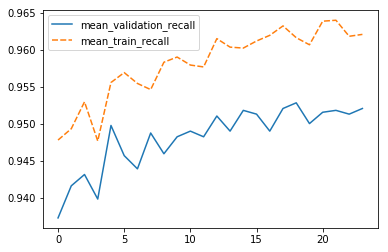

In [137]:
sns.lineplot(data =bc_grid_scores)
#plt.ylim(0,1)

In [142]:
X_test.drop(['Serves'], axis=1, inplace=True)

C:\Users\patri\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [143]:
gbc_gs.best_estimator_.score(X_test,y_test)

0.9269870609981515

In [132]:
pd.Series(gbc.feature_importances_,index=X_train.columns).sort_values(ascending=False).head(10)

TotalRev            0.665771
NumStatesOP         0.053505
DurationMeanIP      0.049822
ClmPerPt            0.037040
DurationMedianIP    0.027106
NumStatesIP         0.020988
ChronCondsMedian    0.017845
ChronConsMode       0.015228
RevPerPt            0.014046
DupClaimRatio_IP    0.009148
dtype: float64

In [148]:
svm_c = svm.SVC(probability=True)

In [149]:
svm_c.fit(X_train,y_train)
svm_c.score(X_train,y_train)

0.8576344634208514

In [158]:
svc_gs_params = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'C':np.logspace(-2,2,5)}
svc_gs_params

{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
 'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])}

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [161]:
svc_c_gs = GridSearchCV(svm_c,cv=kf5,param_grid= svc_gs_params, return_train_score=True, verbose=2, n_jobs=-1)

In [ ]:
svc_c_gs.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
svc_grid_scores = pd.DataFrame({
                               'mean_validation_recall':svc_gs.cv_results_['mean_test_score'],
                               'mean_train_recall': svc_gs.cv_results_['mean_train_score']})
svc_grid_scores.head()

In [ ]:
sns.lineplot(data =svc_grid_scores)